<a href="https://colab.research.google.com/github/SeamusHerrod/EECS-645-Computer-Architecture/blob/main/EECS_645.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<center>**MIPS Instruction Set Architecture**

##Arithmetic Operations:

Addition Example
>A = B + C 
> 
>All operands (A, B, C) in Memory

**<center>0-Operand ISA** -> Stack m/cs</center>

```

push B # [TOS] <- MEM[B] read takes one cycle, write take 1 cycle, 2 total 

push C # [TOS] <- MEM[C] 2 cycles 

add    # [TOS] <- [TOS - 1] + [TOS - 2] 2 reads and 1 cycle for addition, 1 cycle for the write, 4 cycles 

pop A  # MEM[A] <- [TOS] 2 cycles 
 
pop C  # MEM[C] <- [TOS] 2 cycles 
```

5 instructions, 12 cycles, CPU bound by memory, no copies of operands in CPU

$CPI = 12/5 = 2.4$

**<center>1-operand ISA**</center>

MDR = Memory Data Register - MDR is INSIDE the CPU, which is why it doesn't take any cycles to read/write to MDR
MBR = Memory Buffer Register

```
load B  # MDR <- MEM[B] read B, no cycle for read into MDR 1 cycle

add C   # MDR <- MDR + MEM[C] read C, add to MDR, 2 cycle

store A # MEM[A] <- MDR write MDR to MEM, 1 cycle 
```
3 instructions, 4 cycles, CPU bound by memory, a copy of only A in CPU

$CPI = 4/3 = 1.33$

**<center>2-Operand ISA**</center>
**CISC (Complex Instruction Set Computer)**
```
move A, B  # MEM[A] <- MEM[B]

add A, C   # MEM[A] <- MEM[A] + MEM[C]
```
2 instructions, 6 cycles, CPU bound by memory, no copies of operands in CPU

**RISC (Reduced Instruction Set Computer)**
- register files are IN the CPU, so it takes 0 clock cycles to 

```
load r1, B   # R[r1]  <- MEM[B] 1 cycle 

load r2, C   # R[r2]  <- MEM[C] 1 cycle 

add r2, r1   # R[r2]  <- R[r2] + R[r1] 1 cycle 

store A, r2  # MEM[A] <- R[r2] 1 cycle
```

4 instruction, 4 cycles, CPU **UNBOUND** by memory, a copy of A and (B or C) in CPU

**<center>3-Operand ISA**</center>
**CISC**

```
add A, B, C   # MEM[A] <- MEM[B] + MEM[C] 2 reads, 1 addition, 1 write
```

1 instruction, 4 cycles, CPU bound by memory, no copies of operands in CPU

**RISC**

```
load r1, B       # R[r1] <- MEM[B]

load r2, C       # R[r2] <- MEM[C]

add r3, r2, r1   # R[r3] <- R[r2] + R[r1]

store A, r3      # MEM[A] <- R[r3]
```

4 instructions, 4 cycles, CPU **UNBOUND** by memory, a copy of **ALL** operands in CPU

##CPU Register file:

So how can this reading and writing from the CPU register file be so fast, 

Typical RAM is single-port memory, meaning exactly 1 data access/change can happen at once 
  - cannot read and write within one clock cycle 

the Register file in the CPU is 3-ported memory, 2 for reading and 1 for writing; meaning that 2 reads and 1 write can happen every cycle

##<center>**MIPS Arithmetic Operations:**

* Add and subtract, three operands
  * Two sources and one destination

MIPS has 32 x 32-bit register file
  * Used for frequently accessed data
  * Numbered 0 to 31
  * 32-bit data called "word"

Assembler Names: 

Naming Convention for MIPS Registers:

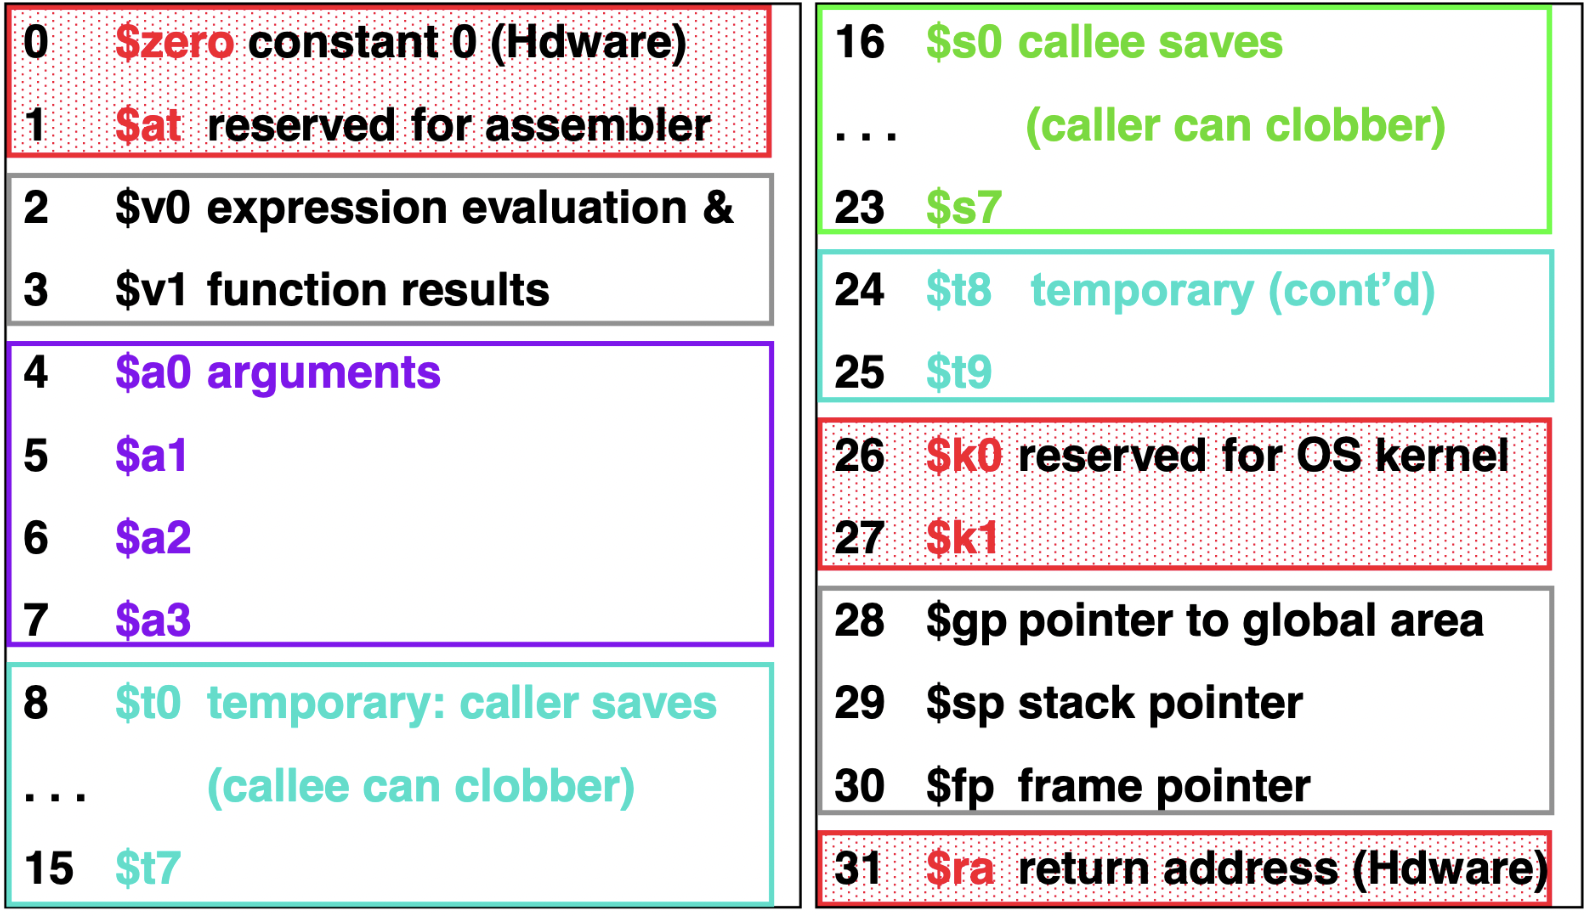

##MIPS ARITHMETIC INSTRUCTIONS

* MIPS Assembly language arithmetic statement
  ```
  add $t0, $s1, $s2

  sub $t0, $s1, $s2

  ```
Each arithmetic instruction specifies exactly THREE operands

  ```operand  destination  source1  source2```



**Register Operand Example:**
```
C code:

  f = (g + h) - (i + j);
    f, ..., j in $s0 ... $s4

  Compiles MIPS code:

  add $t0, $s1, $s2
  
  add $t1, $s3, $s4
  
  sub $s0, $t0, $t1 

```

Here we are using:

7 registers, 3 instructions, 3 cycles, 

$CPI = \frac{3}{3} = 1$

We can optimize the number of registers:

```
f = (((g+h) - i) - j);
    f, ..., j in $s0 ... $s4

add $s0, $s1, $s2

sub $s0, $s0, $s3

sub $s0, $s0, $s4
```
Now we are using:

5 registers, 3 instructions, 3 cycles

$CPI = \frac{3}{3} = 1$

The first implementation is parallelizable (both adds can be done at the same time)

while the second implementation (with two subs) cannot be parallelizable at all


IDEAL CPI with parallelization:

>$\frac{1}{n}$ where n is the number of cores in the CPU 


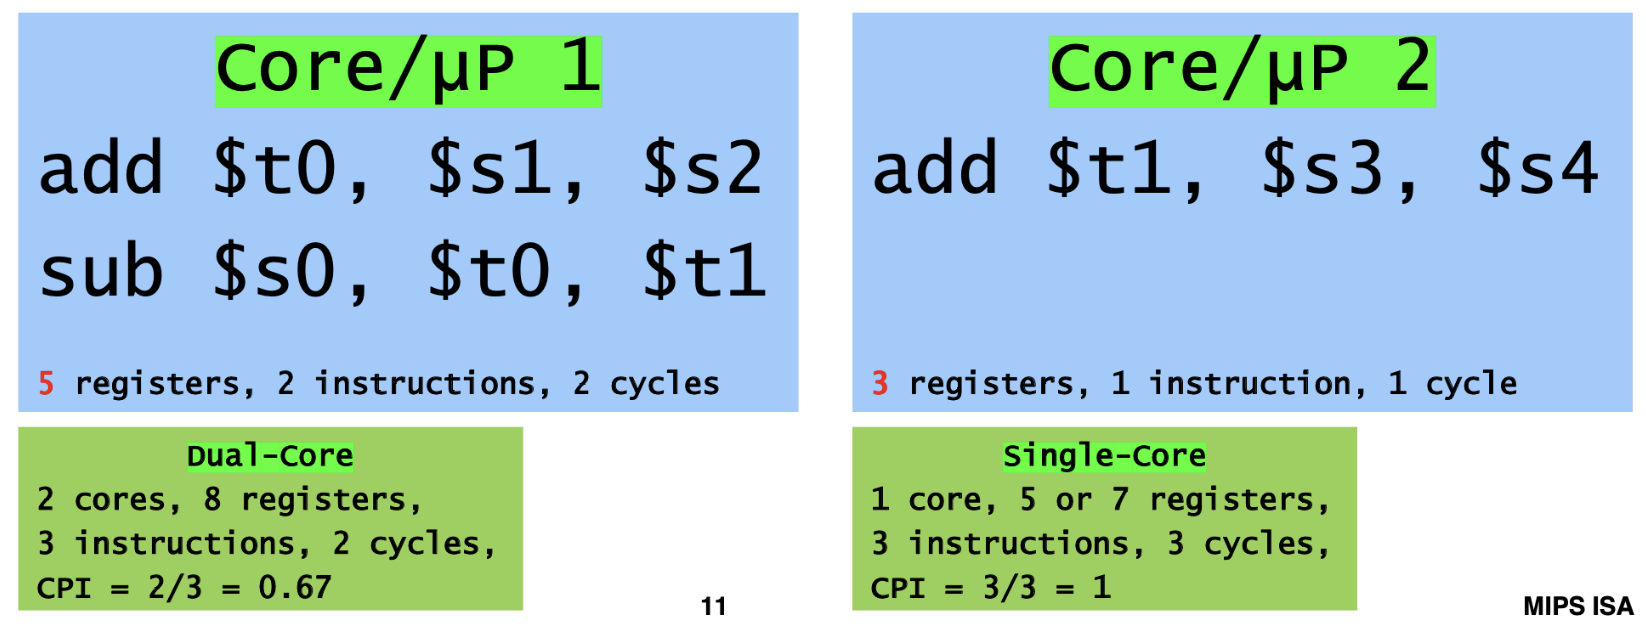






Notice that the dual-core implementation uses 8 registers: 
  - that is because $t1 is Core 1 is a different register than $t1 in core 2

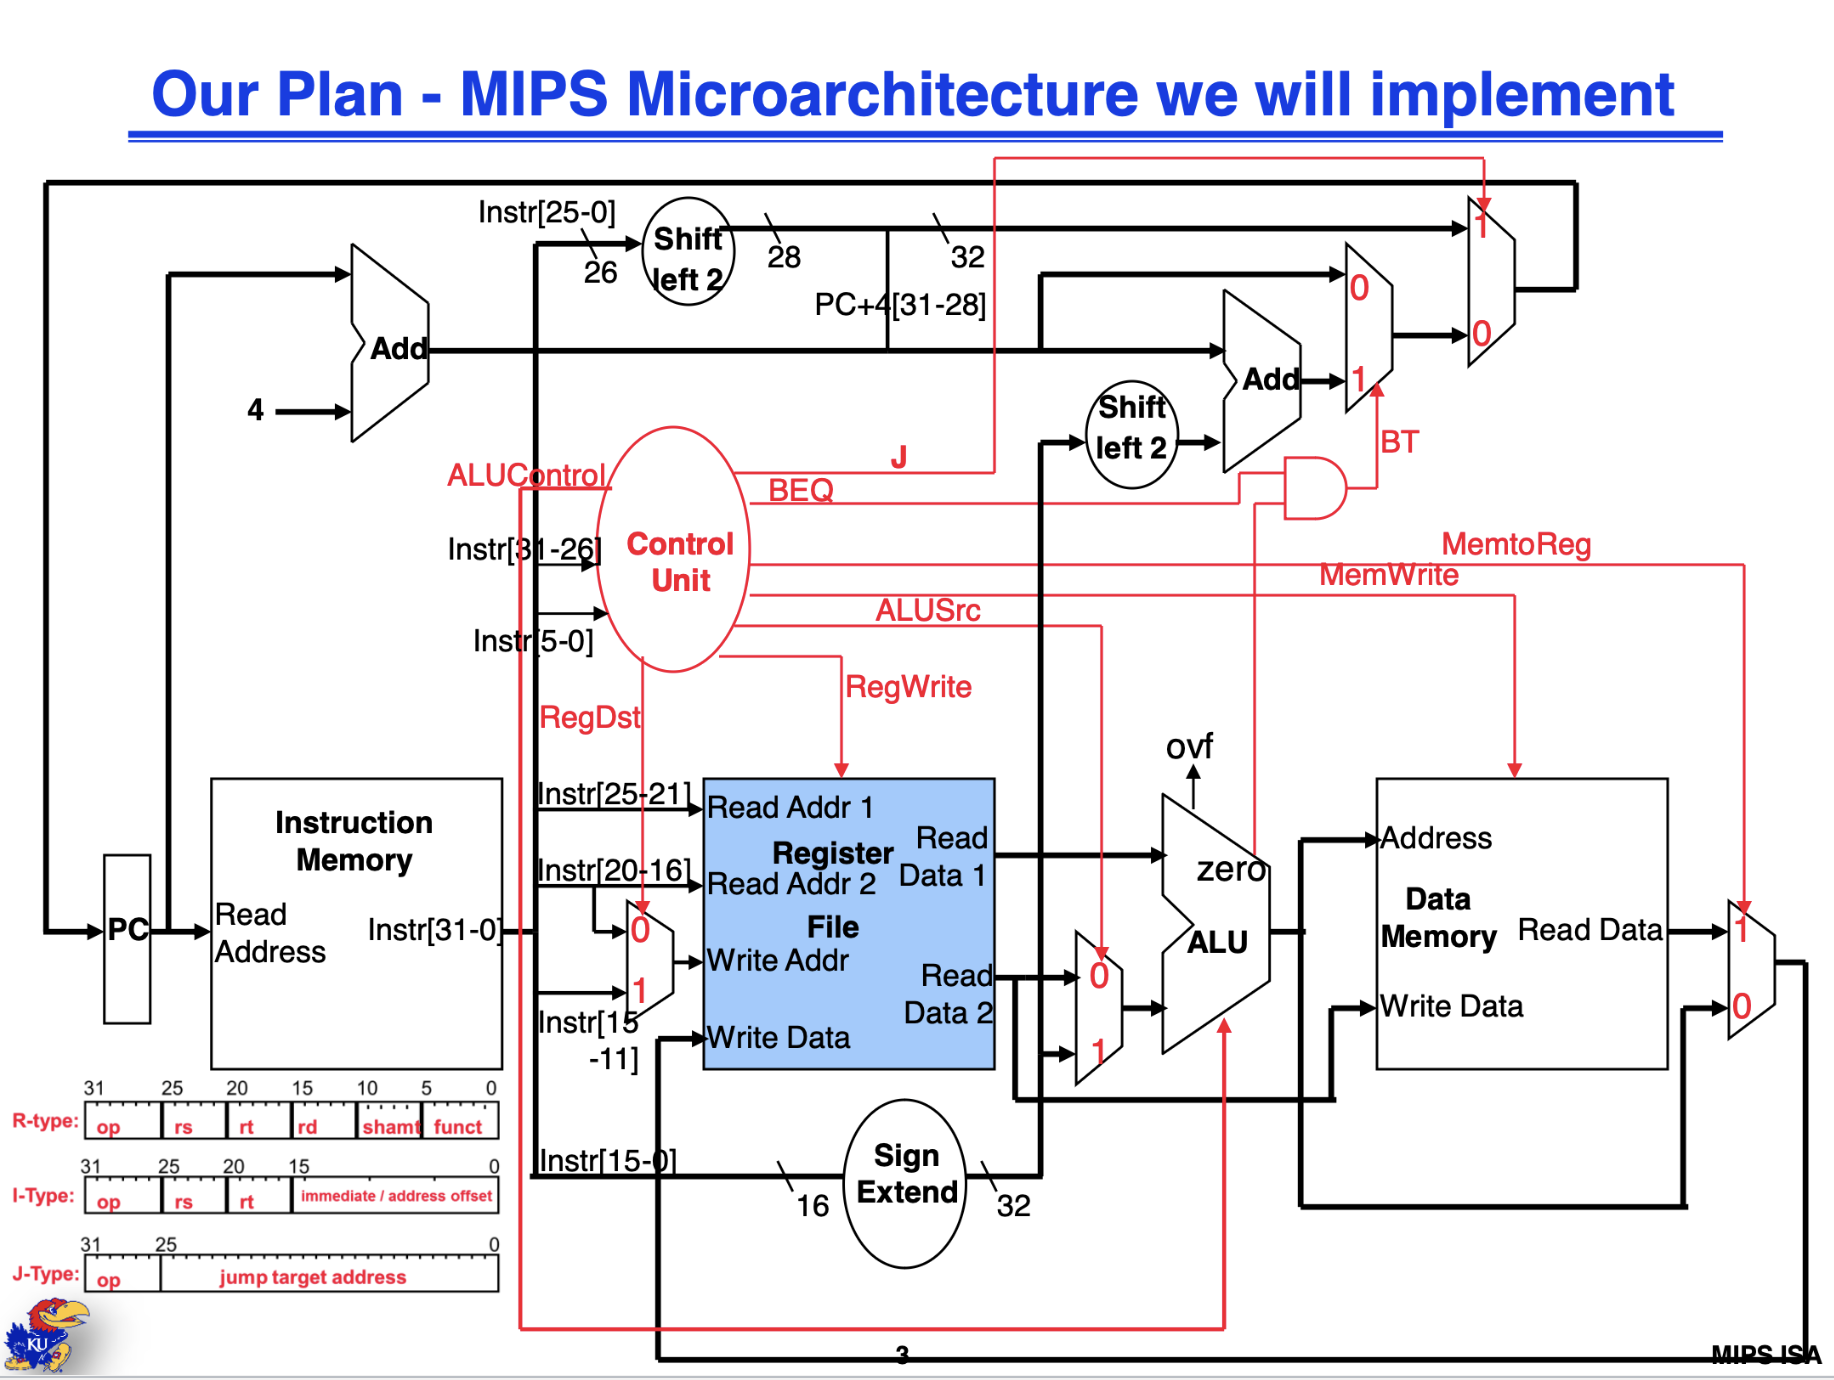

#<center>**Register File:**

- Operands of arithmetic instruction must be from a limited lumber of special locations contained in the datapath's register file
  * Thirty-two Registers
    - 2 read ports 
    - 1 write ports 

depth is 32 locations 
width is 32-bits 

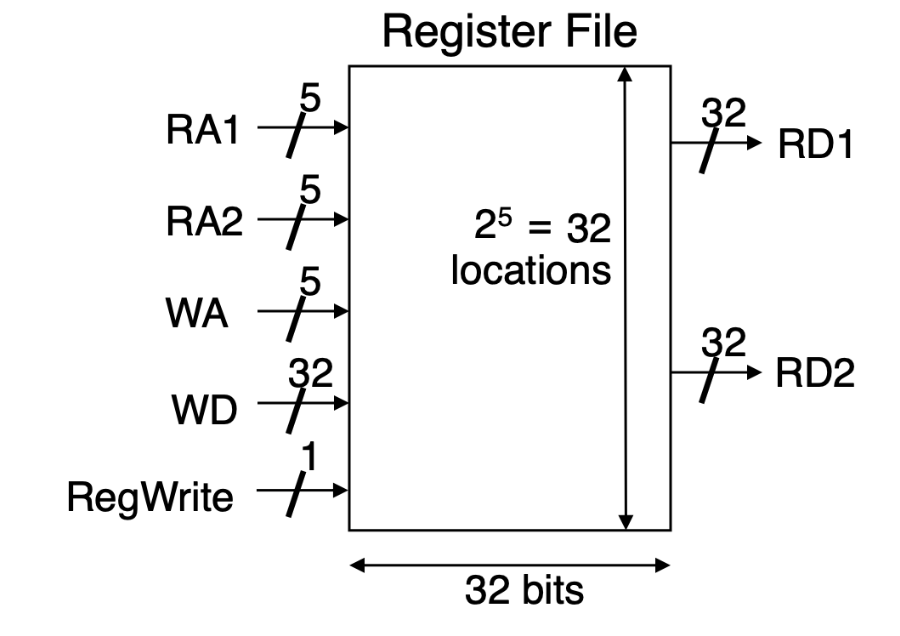

**In the above Diagram**

RA = Read Address 
RD = Read Data 

WA = Write Address
WD = Write Data

RegWrite = enable write 
  - needed for write but not read to guard against accidentally overwriting data



##<center>**Register File - Specifications:**

* Fast

  * smaller is faster, make the common case fast 

* Easy for a compiler to use 

* Improves code density



**FOR HOMEWORK 3, NEED 3 PROCESS STATEMENTS, AND THEN DESCRIBE THEM BEHAVIORALLY**

    FOR READ OUTPUT
    RD1 <= reg_file(UNSIGNED(RA1))

```
  FOR write 

  if (regWrite = '1') then 

    regfile(WA) <= WD;
```

##<center>**The Constant Zero:**

* MIPS register 0 ($0) is the constant 0
  * CANNOT (should not) be overwritten

* useful for common operations
  * initialize registers

    *add $t2, $zero, $zero*
  
  * Move between registers
  
    *add $t2, $s1, $zero*

- Small constants are used quire frequently
  - 50% of operands in many common programs
    A = A + 5;
    B = B + 1;
    C = C - 18;

Possible solutions (not good solutions)
  - hard-wired registers like $0
  - put "typical constants" in memory 

Solution:
  - allow immediate values in the operands of instructions
  
* Include constants INSIDE arithmetic instructions
  * must faster than if they have to be loaded from memory
  * constants come in from memory WITH the instruction

* MIPS immediate instructions:
```c
addi $s4, $s3, 4     // R[$s4] = R[$s3] + 4
```

There is no *subi* instruction, because a signed number can be used with addi to represent a subtraction


2's Complement Signed Integers:

Some specific numbers:

zero: 000...000

-1  : 111...111

Most positive: 0111...111

Most negative: 1000...000
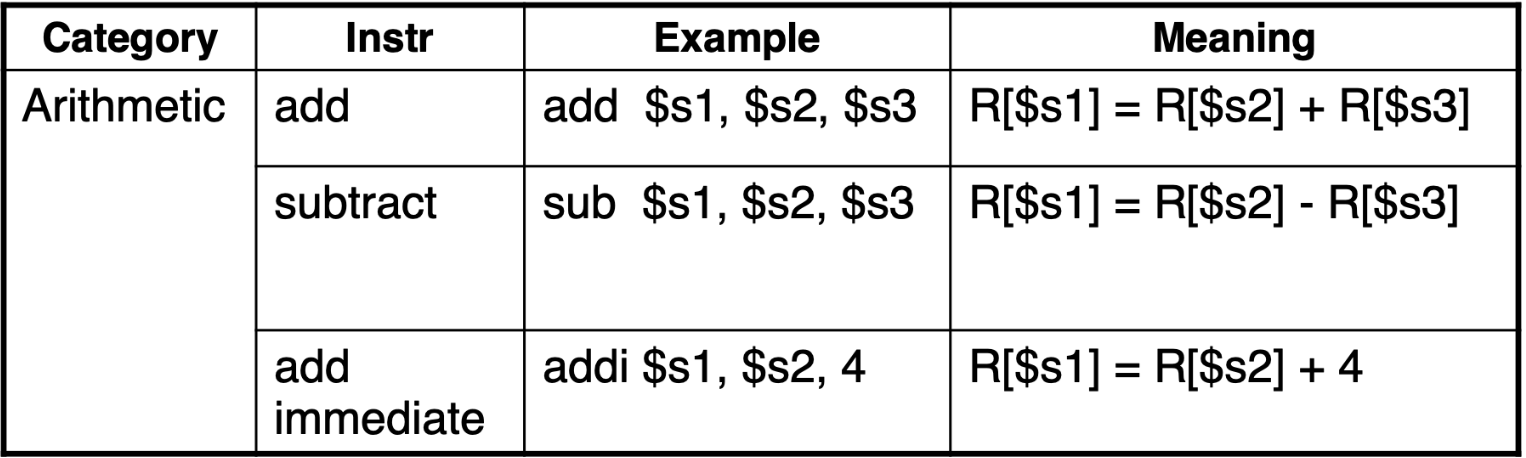

##<center>**Sign Extension:**

* Representing a number using more bits than it currently has
  * Preserve the numeric value

* In MIPS instruction set
  * addi: extend immediate value

* Replicate the sign bit to the left
  * c.f. unsigned values: extend with 0s

* Example:
  - +2: 0000 0010 => 0000 0000 0000 0010
  - -2: 1111 1101 + 1 => 1111 1111 1111 1110

##<center>**Processor - Memory Interconnections:**

* Memory is a large, single-dimensional array
* An Address acts as the index into the memory array 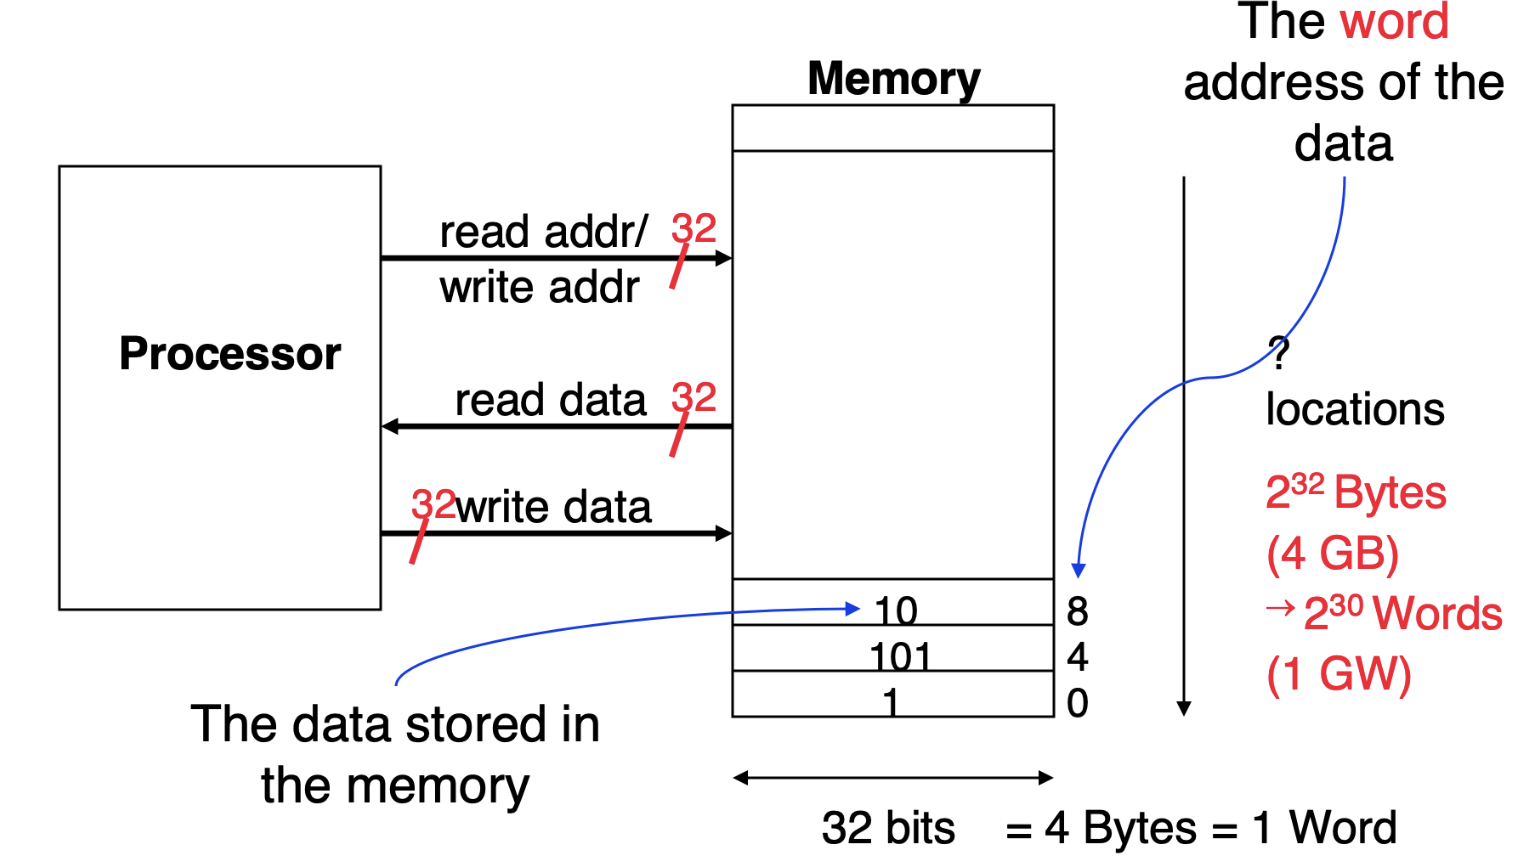

##above diagram
The above diagram describes SINGLE PORTED MEMORY, there is only ONE shared address line

- Next lab will implement sigle-ported memory for RAM of processor

Memory should be byte addressable 
> 32 bits = 4 bytes = 1 word, so word address increments by 4s 
>> 32bit address line can address 4GB 
>> 
>> 32 bit address line can address 1GW 

##<center>**MIPS Data Memory - Specification & Architecture**

M 32-bit registers
  * One Read Port
  * One Write port

  * One shared address port

##<center>**MIPS Instruction Memory:**

M 32-bit registers
  * One read port 
  * ZERO write ports -> ROM (Read Only Memory)





RESET for Instruction Memory loads my_program into the intr_mem 

sensitivity list - rst, address 
```  
  if rst = '1'

    load my_program to intr_mem
  
  else
  
    run the program 
```

##<center>**Memory Operands**
**<center>The MIPS ISA: Load and Store</center>**

* main memory used for composite data
  * Store result from register to memory 
* Memory is Byte addressed
  * Each address identifies and 8-bit byte
* Words are aligned in memory
  * Word address must be a multiple of 4
MIPS is Big Endian
  * Most-significant byte is stored in the lower-index

##<center>**Accessing Memory**

* MIPS has two basic *data transfer* instructions for accessing memory

```
lw $t0, 4( $s3 ) # load word from memory
  // 4 is the offset from the base address, $s3

sw $t0, 8( $s3 ) # store word from memory 
  // 8 is the offset from base address, $s3
```

##**MIPS memory addressing:**

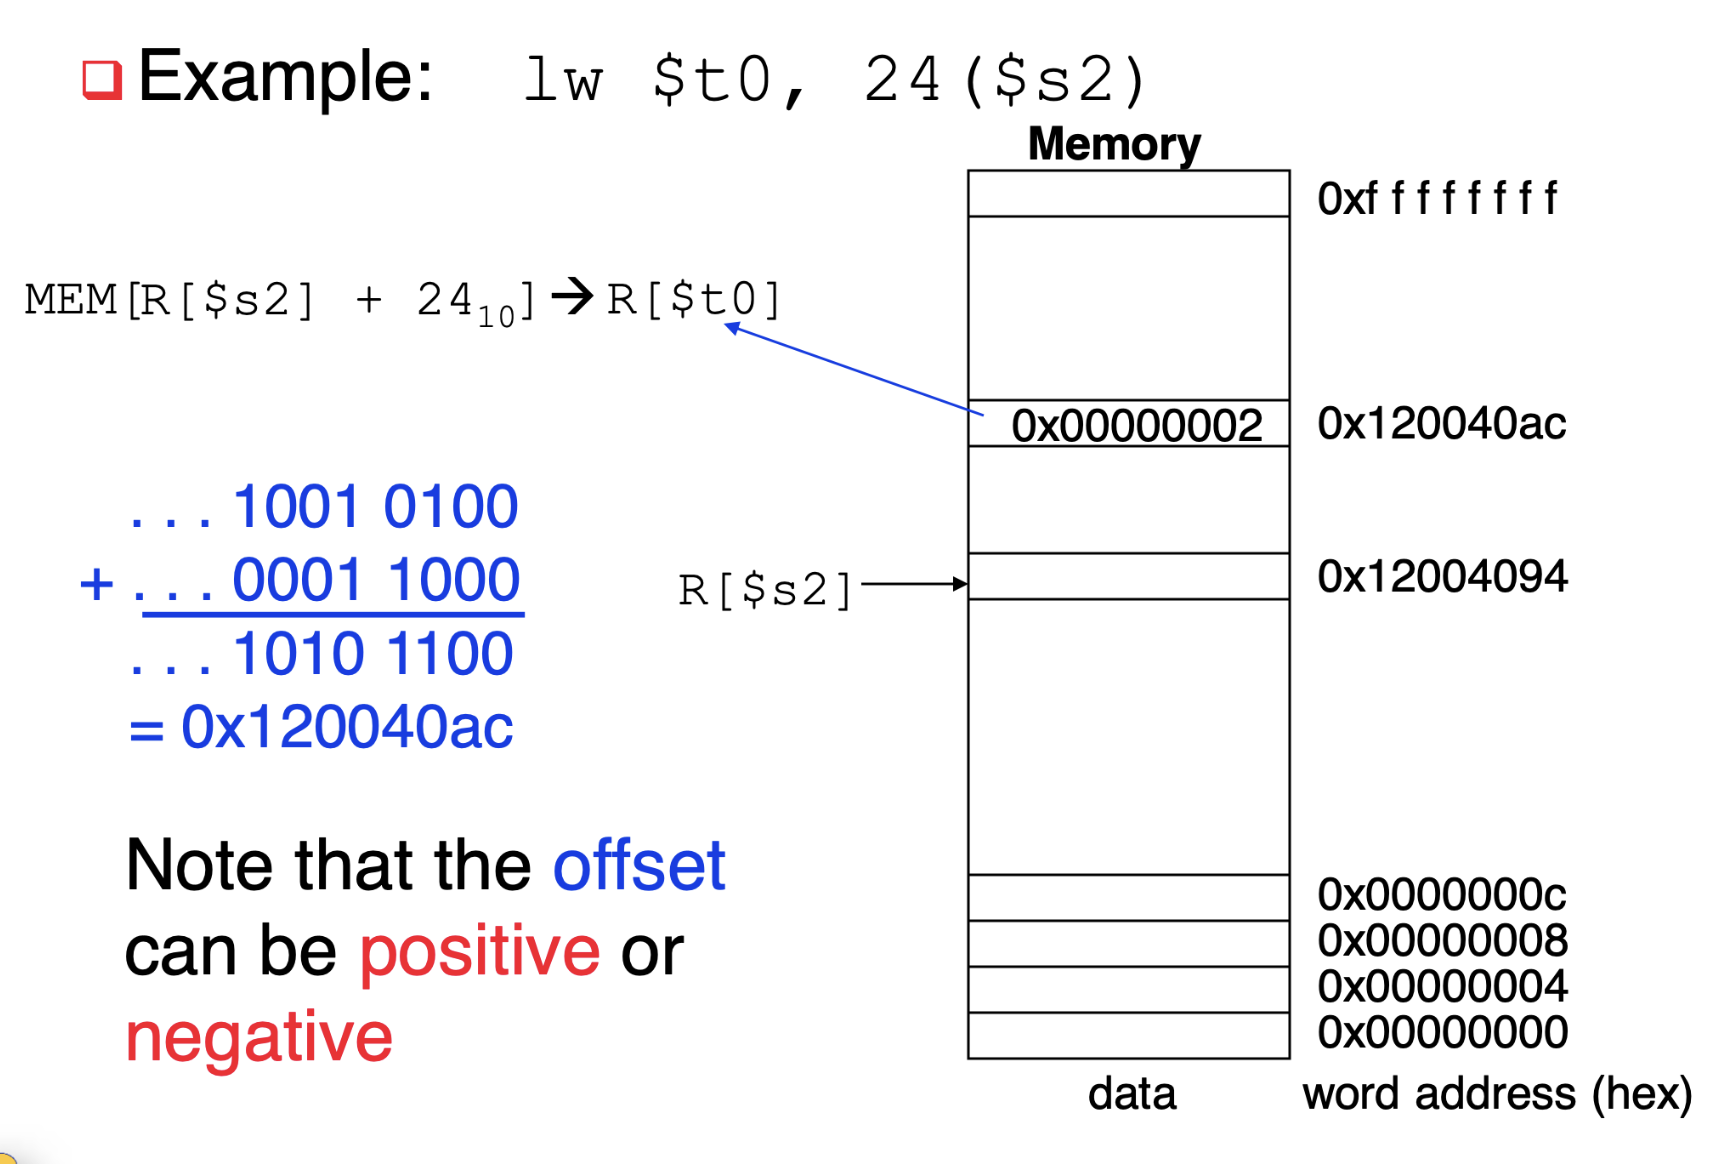

##<center>**Compiling Loads and Stores:**

* Assuming that
  * variables b is stored in register $s1
  * base address of array A is in register $s4

* What is the MIPS assembly code for the C statement:

>>```c
A[8] = A[2] - b
```
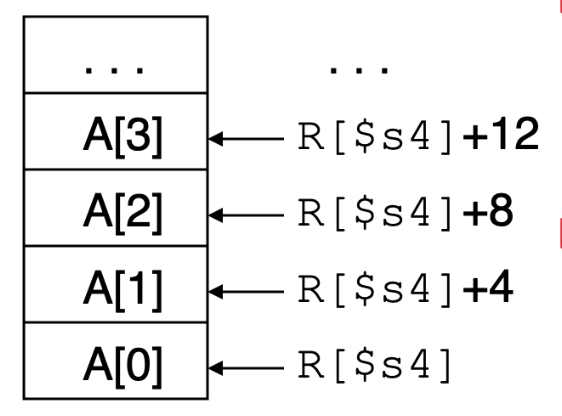

##<center>**Compiling Loads and Stores:**

```
lw    $t0, 8( $s4 )

sub   $t0, $t0, $s1

sw    $t0, 32( $s4 )
```

##<center>**Compiling with a Variable Array Index**

* Assuming that 
  * Variables b, c, and i are stored in registers $s1, $s2, and $s3 respectively

* What is the MIPS assembly code for the C statement:
```c
add $t1, $s3, $s3  # array index is in $s3
add $t1, $t1, $t1  # temp reg $t1 holds 4 * 1
add $t1, $t1, $s4  # addr of A[i] now in $t1
lw $t0, $t1, $t4   # content of A[i] now in $t0
sub $s2, $t0, $s1
```

#<center>**MIPS ALU: Specification & Interface**

ALU used for
  * R-type: ALU function depends on *funct field*
  * Load/Sotre: ALU Function = add 
  * Branch: ALU Function = subtract

Operations/Functions
  * Up to 16 operations ( we will only implement only 6 )
  * Signed / Unsigned arithmetic ( we will implement only signed )

* Combinational circuit: 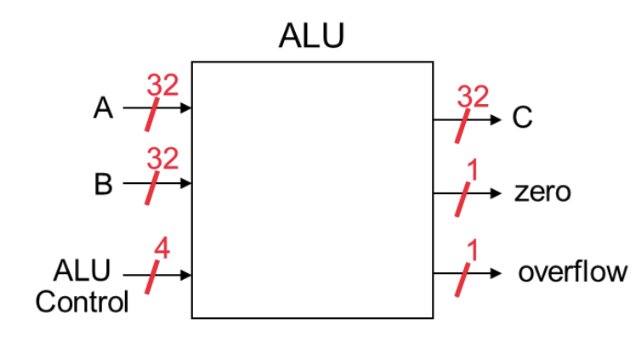


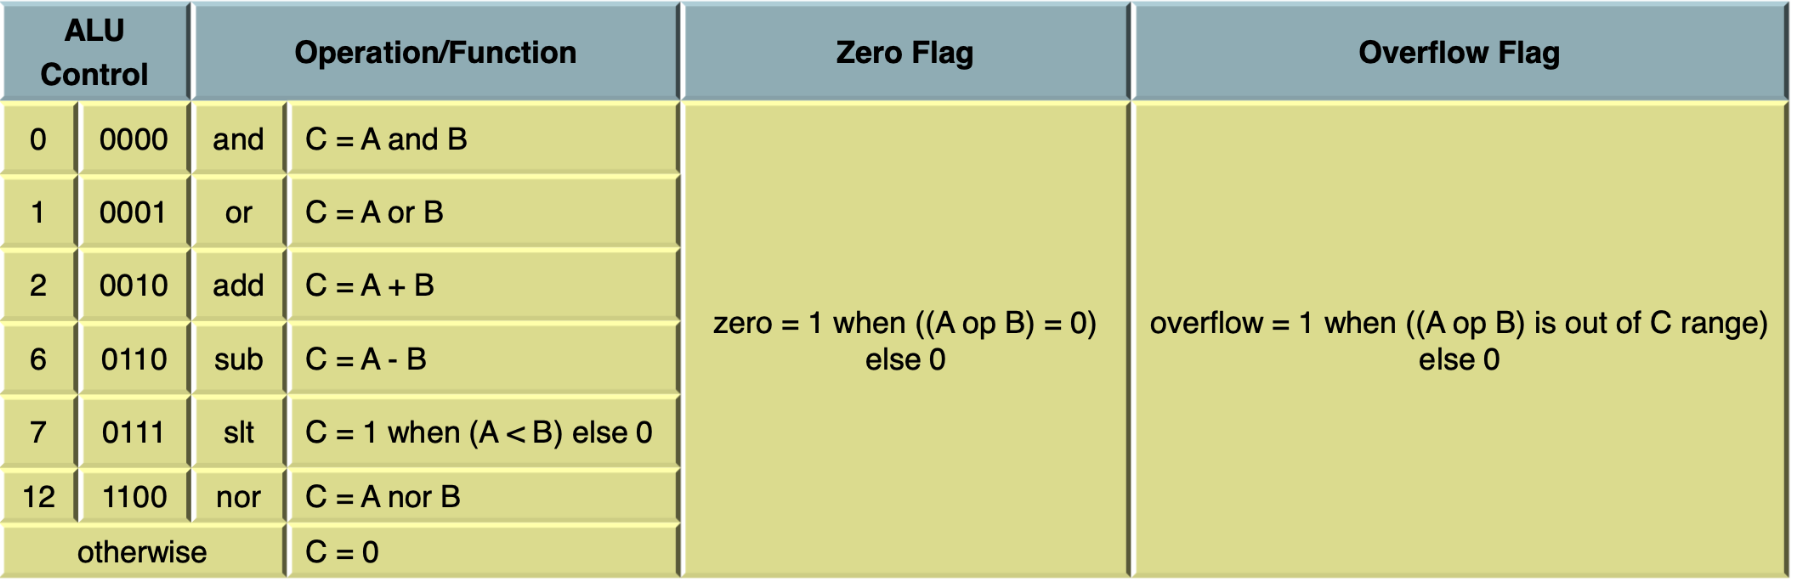

##<center>**overflow and signed bit representation**

Logical operations will never produce overflow 

Addition and Subtraction can generate overflow 

when adding two positive (signed) numbers, if the result has a 1 in the MSB, then overflow occurred 

similarly for negative numbers, when adding two negative numbers, if the result has a 0 in the MSB, then overflow occurred 


**Dynamic range**

$-2^{n-1} → +2^{n-1} - 1$

S_A, S_B, S_C = signed bits of A, B, C

$ovf = S̄_A * S̄_B * S_C + S_A * S_B * S̄_C$
> if the signed but of A and B are 0, and the signed bit of C is 1, then overflow
>
> if the signed bit of A and B are 1, and the signed bit of C is 0, then overflow


#<center>**MIPS R-Format Instructions:**

Instruction Fields:
  * op: operation code ( opcode - what operation to be executed )
  * rs: first source register number
  * rt: target ( second source ) register
  * rd: destination register number
  * shamt: shift amount ( 00000 for now )
  * funct: function code ( extends opcode )

  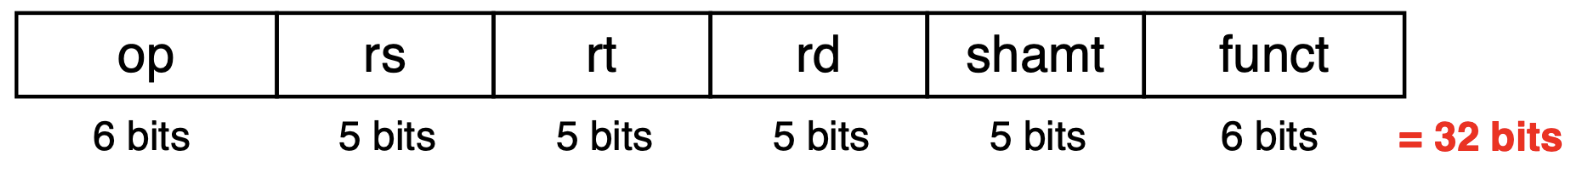

##**Practice using MIPS Reference Sheet BEFORE EXAM**

##<center>**R-Format Example:**

```
add $t0, $s1, $s2
```
after seeing this, go to the reference sheet and check format of add instruction
> add is R format
>> so it has 6 fields

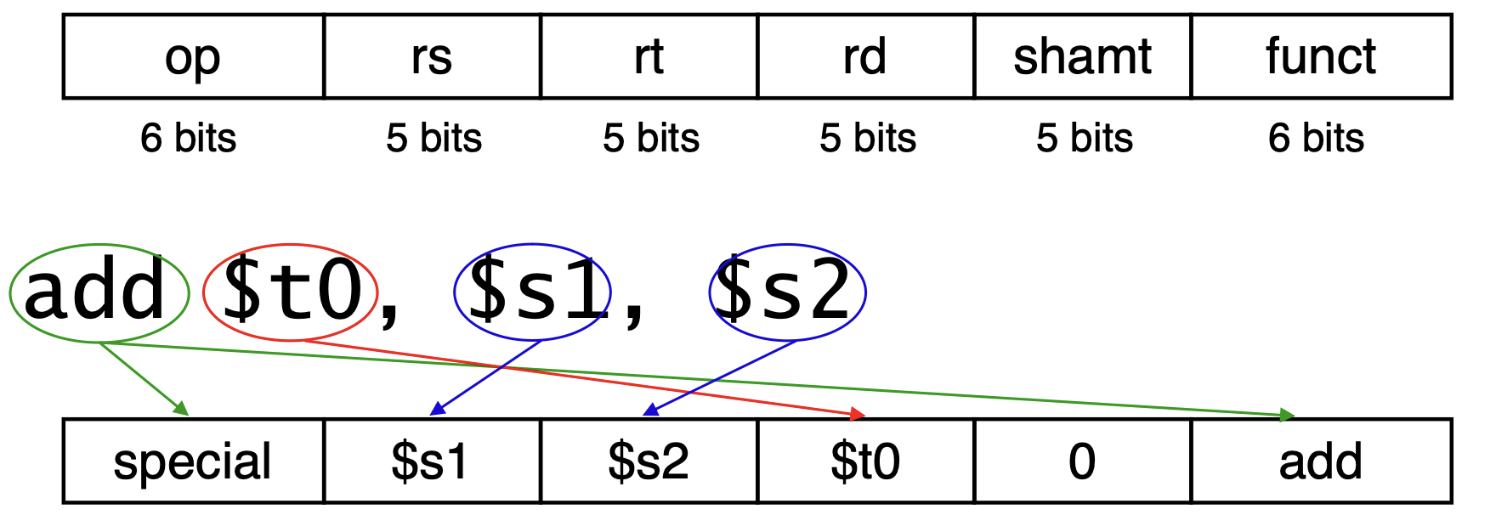


##<center>**R-Format Example Cont:**
above, ```$s1 = rs, $s2 = rt, $t0 = rd```

Now, for each field, get the binary form of the numerical values in those fields
> look at register file reference sheet 

``` $s1 = 17, $s2 = 18, $t0 = 8 ```
opcode for add is 0, and funct code is $(20)_{16} = 00100000$ BUT only 6 bits in funct field, so, code is actually 100000

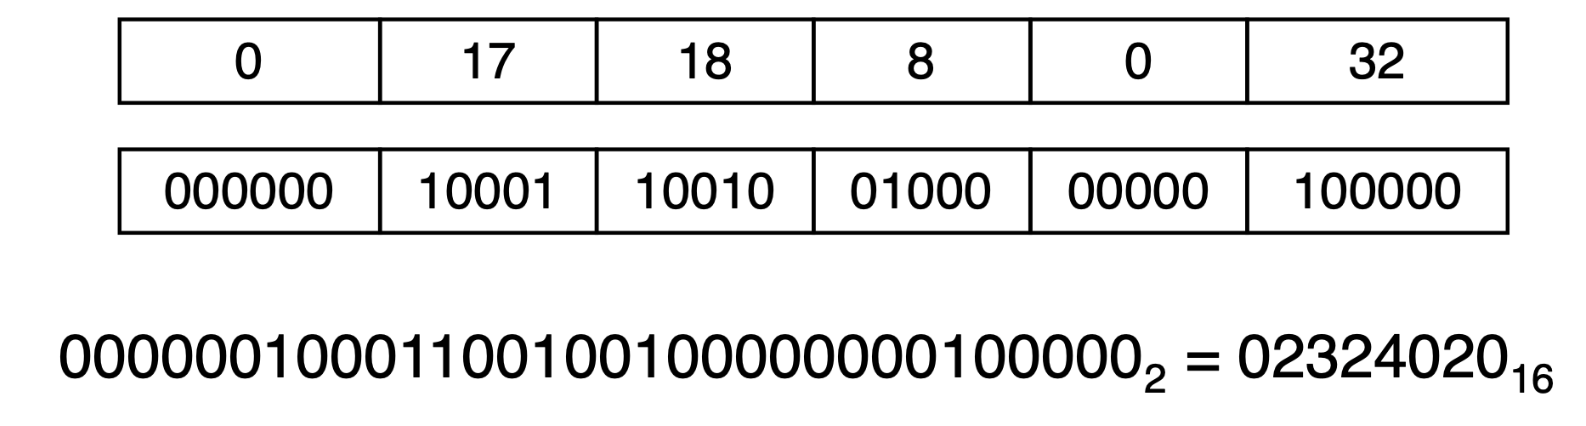

##<center>**MIPS I-format Instructions:**

* Immediate arithmetic and load/store instructions:
  * op: operation code ( opcode )
  * rs: first source register number
  * rt: target ( destination or second source ) register number
  * Constant: $-2^{15} → +2^{15} - 1$
  * Address: offset added to base address in rs

* Design Principle 4: Good design demands good compromises
  * different formats complicate decoding, but allow 32-bit instructions uniformly
  * Keep formats as similar as possible

  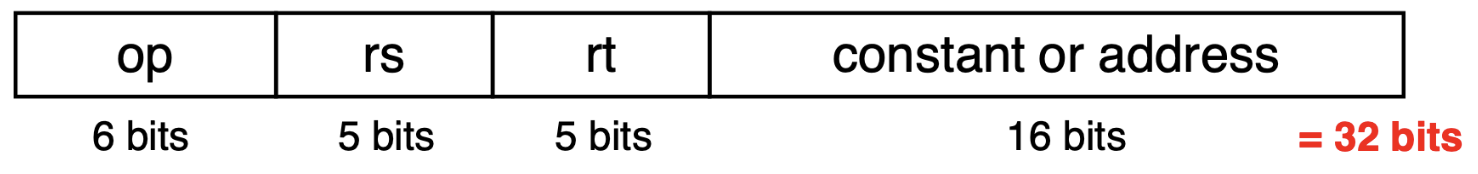

##<center>**The Compromise of I-format**

only 16 bits are available to disignate immediate values 
  * becasue these are signed integers, the range of constants is lower

>>$ -2^{15} → +2^{15} - 1 $

##<center>**I-format Example:**

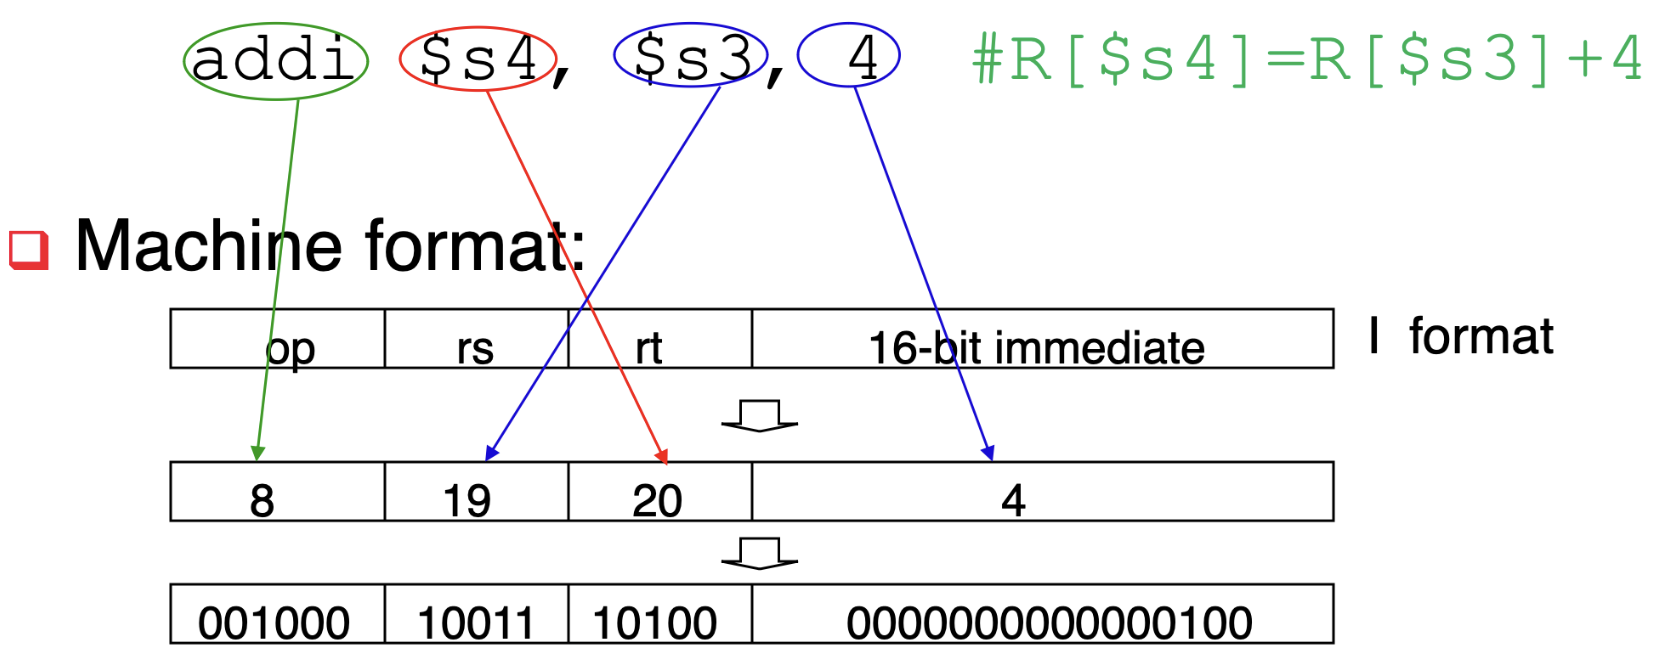

##<center>**Instruction Format Encoding:**

* each format has a distinct set of values in the *op field*

* can *reduce the complexity* with multiple formats by keeping them as similar as possible
  * *First three fields* are the same in R-type and I-type 

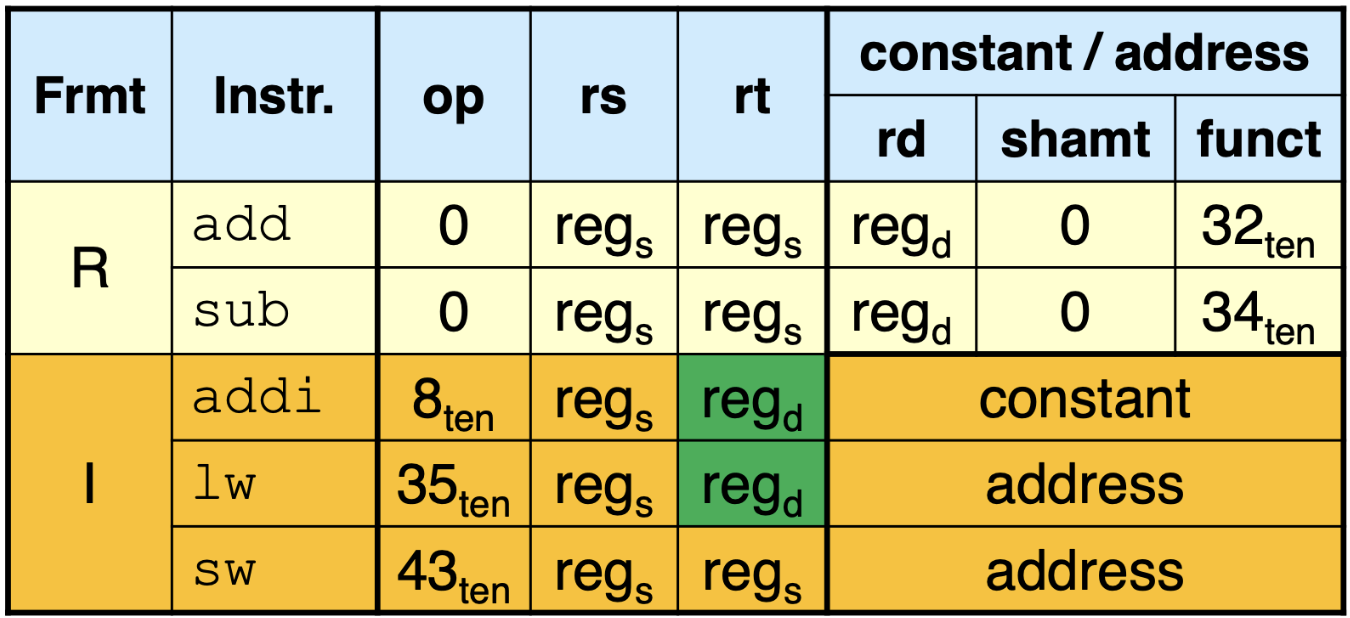

##<center> **Logical Operations:**

* Instructions for bitwise manipulation

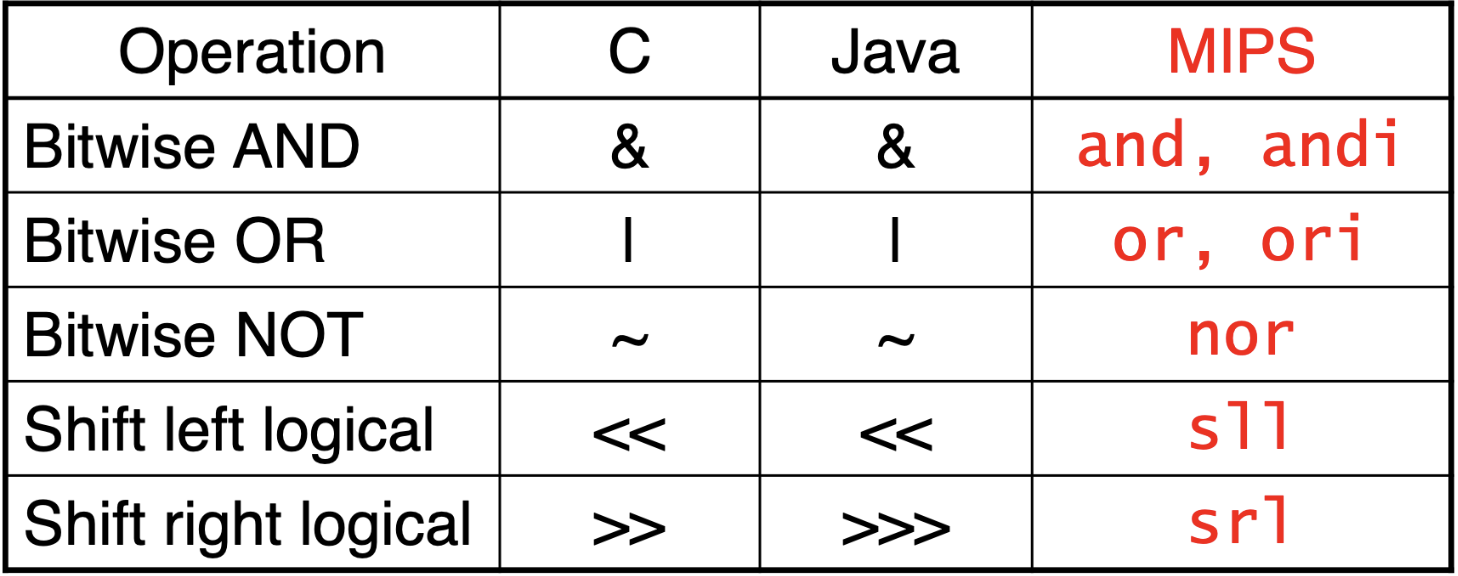

##<center>**AND operations:**

* useful to *mask bits* in a word 
  * select some bits, clear other to 0
  * set some bits to 0, and leave other unchanged

##<center>**OR operations**

##<center>**NOT operations**

##<center>**Shift Operations:**

* shamt: how many positions to shift
  * THESE ARE R-format,
    * R-format has a specific field for shift values 

* Shift left logical (arithmetic) ```sll $t2, $s0, 8 #R[$t2] = R[$s0] << (8 bits)```
  * shift left and fill with 0 bits
  * sll by i bits multiplies by $2^i$

* Shift Right logical ``` srl $t2, $s0, 8 #R[$t2] = R[$s0] >> (8 bits) ```
  * shift right and fill with 0 bits 
  * srl by i bits divides by $2^i$( unsigned )

* shift right arithmetic ``` sra $t2, $s0, 8 #R[$t2] = R[$s0] >>> (8 bits) ```
  * maintains arithmetic correctness 
  * shift right and fill with sign-bit
  * sra by i bits divides by $2^i$ ( signed )


REMEMBER: the registers are 32 bits, and the shamt field is 5 bits 
  * with 5 bits, 0-31 bits can be shifted 
    * if we try to shift > 31 bits, it doesn't matter because at a shift of 31 
      bits, the whole register is cleared 

##<center>**Instructions for Making Decisions:**

* Decision making instructions
  * alter the control flow
  * i.e. change the "next" instruction to be executed 

jumps - unconditional branches

branch - conditional branches

* MIPS *conditional branches* instructions:

  ```beq $s0, $s1, Lbl #go to Lbl if R[$s0] == R[$s1]```
  
  ```bne $s0, $s1, Lbl #go to Lbl if R[$s0] != R[$s1]```

    * **Labels are nothing but addresses in Instruction Memory**


**Example:**

```if ( i == j ) h = i + j;```
* ```i, j, h in $s0, $s1, $s3```

``` beq $s0, $s1, Lbl

BUT THIS IS NOT RIGHT

Lbl add $s3, $s0, $s1
```

CORRECT:
  invert the condition 

```
bne $s0, $s1, Lbl
add $s3, $s0, $s1
Lbl ... 
```

look at conditions, invert the condition, run desired code when (invert logic) NOT true, then Label after, so that the desired instruction is only jumped when inverted logic is TRUE (the original logic is FALSE)


##<center>**Assembling Branches:**

*Instructions:
  * ```
       beq $s0, $s1, Lbl
       bne $s0, $s1, Lbl
    ```


* How is the branch destination address specified?
  * as a relative branch (branch offset)
    * offset from PC

**Specifying Branch Destination:**

* instead of putting the PC offset in terms of the address ( 4 represents a single address offset), we put 1, and then PC can do its own multiplication. by putting 4 ( 0100), then we are losing 2 bits from the 16 bit field effectively making it a 14 bit range instead of 16 

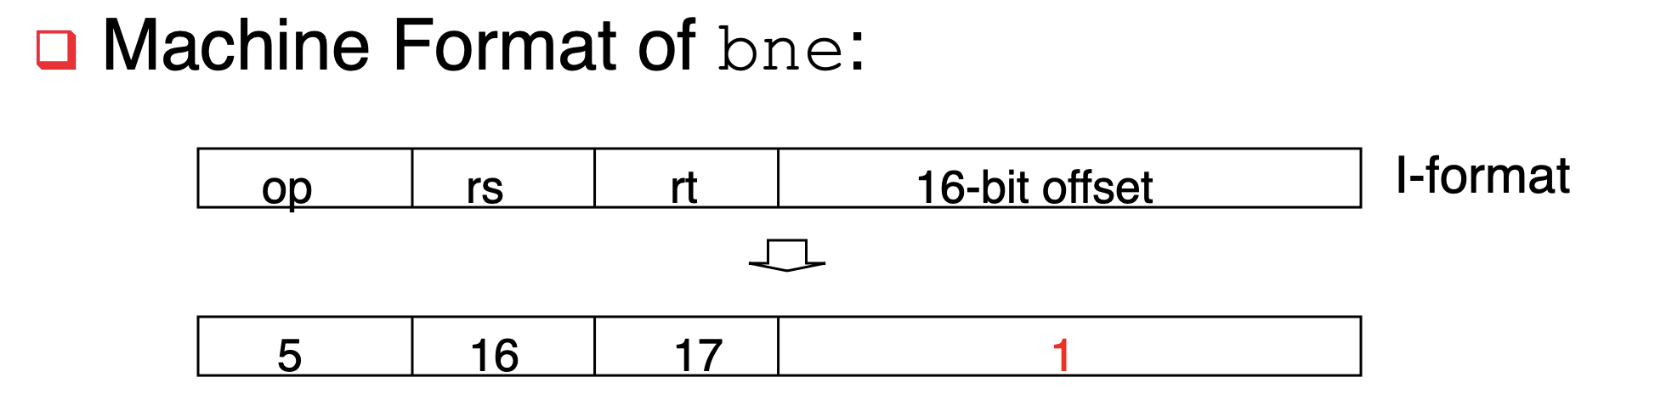

##<center>**Another Instruction for changing Flow:**

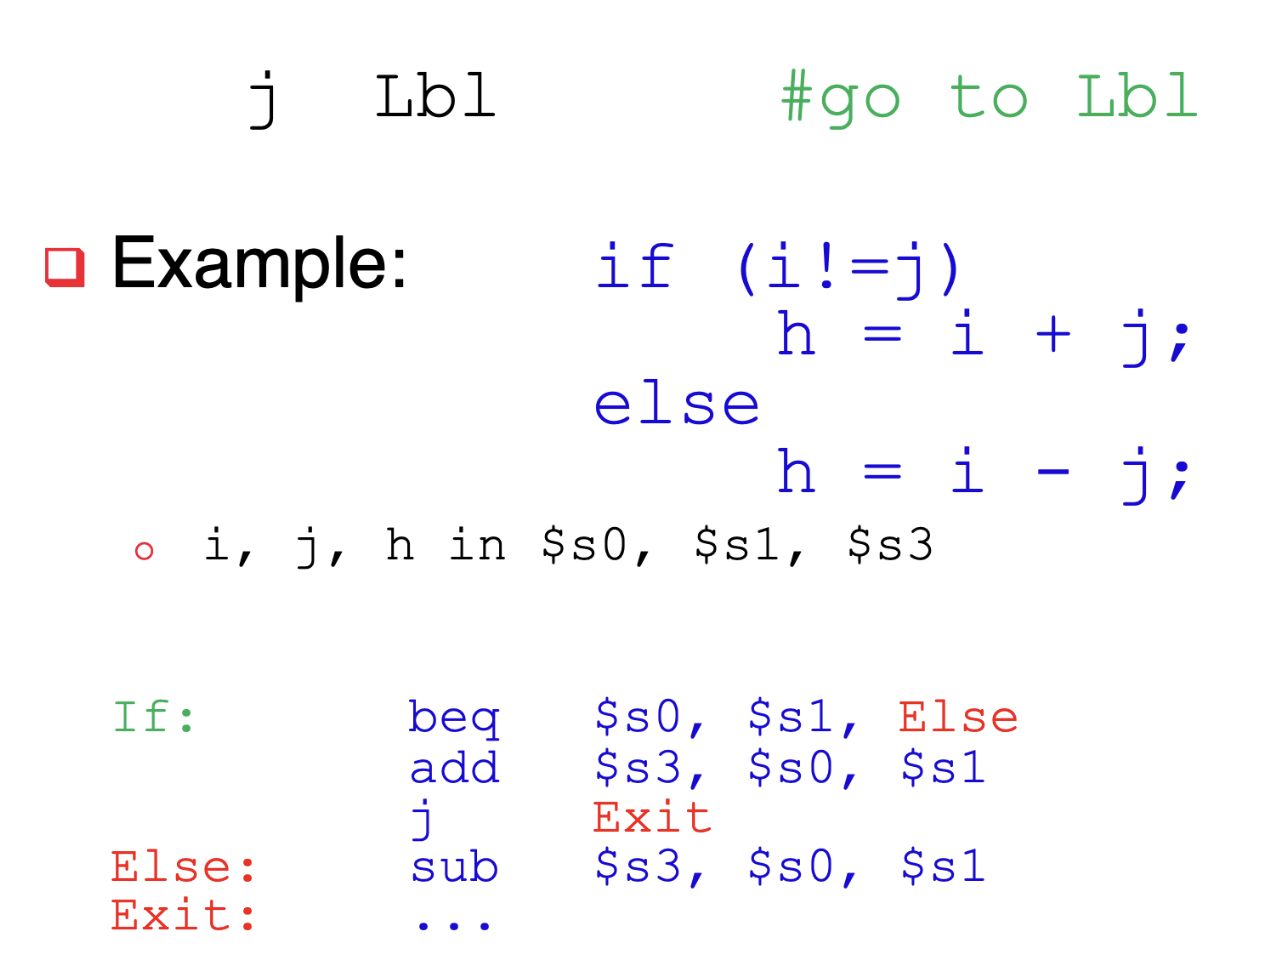

## Unconditional Jump 

``` j Exit ``` is the unconditional jump instruction

##<center>**Assembling Jumps:**

Instruction:

  * ```j Lbl #go to Lbl```

Machine Format ( New format -> J-format )

[ op | 26-bit address ]

[ 2 | ???? ]



#<center>**Midterm Update:**

**Midterm on Friday 3/10**

- Wednesday will be review Session


best questions to study are those present in the lecture slides 
**HOMEWORK** 2 material

4 questions:
  1. amdahl's law
  2. assembly
  3. parallelization speedup
  4. given code in assembly, give information about that assembly code

cheat sheet is **ALLOWED**, single-sheet double sided, letter size (8 1/2" by 11" )

*Write some questions to ask during class on Wed. for Midterm Review*



**I'd bet cash money that we will have to assemble and then compile a while loop**


#<center>**Midterm Review:**

BIG study HW 2, 


Expect 4 Questions:
  1. compiling and assembling high level code 
    * Most likely a loop statement
    * probably the most time consuming question
  2. HW 2 problems
    * ahmdal's law, speedup 
  3. parallelization/sequential 
  4. analyze a snippit of code for how many times memory/registers accessed



CONTENT AFTER HERE ARE NOT GOING TO BE ON THE MIDTERM

##<center>**Branching far Away:**

* what if the branch destination is further away than can be captured in 16 bits?
  * Conditional branches have 16-bit address field


```
If : beq $s0, $s1, L1 
```

We need to use a conditional branch to go to a nonconditional jump instruction (which has a 26-bit address field 

IN order to implement this, we need to invert the logic of the statement


```
If : bne $s0, $s1, L2   #when the original condition is not true, we want to skip the jump 
  j L1
L2: ...
    ...
    ...
...
...
L1: 
```

*Multi-Hops*
  * Invert the condition and insert and unconditional branch 
    * originally this was done manually
    * now, assemblers are able to account for this automatically

  * if we need to branch out of the range of 26 bits then we have to jump to a jump instruction

##<center>**Branch Instruction Design**

Why not blt, bge, etc??

equal and not equal take the same level complexity and are faster than < and > 

Example: 
  the inputs of A > B can be reordered to B > A to compute if A < B 

* We have bne and beq in MIPS but not blt or bge
  * blt and bge are considered pseudo instructions 
    * they are replaced by assembler with multiple basic instructions

* Hardware (comparators) for <, <=, ... are SLOWER than =, !=
* combining comparators with branch involves more work

SO, we design one instruction to be penalized instead of penalizing the performance of all comparator operations 

##<center>**slt**

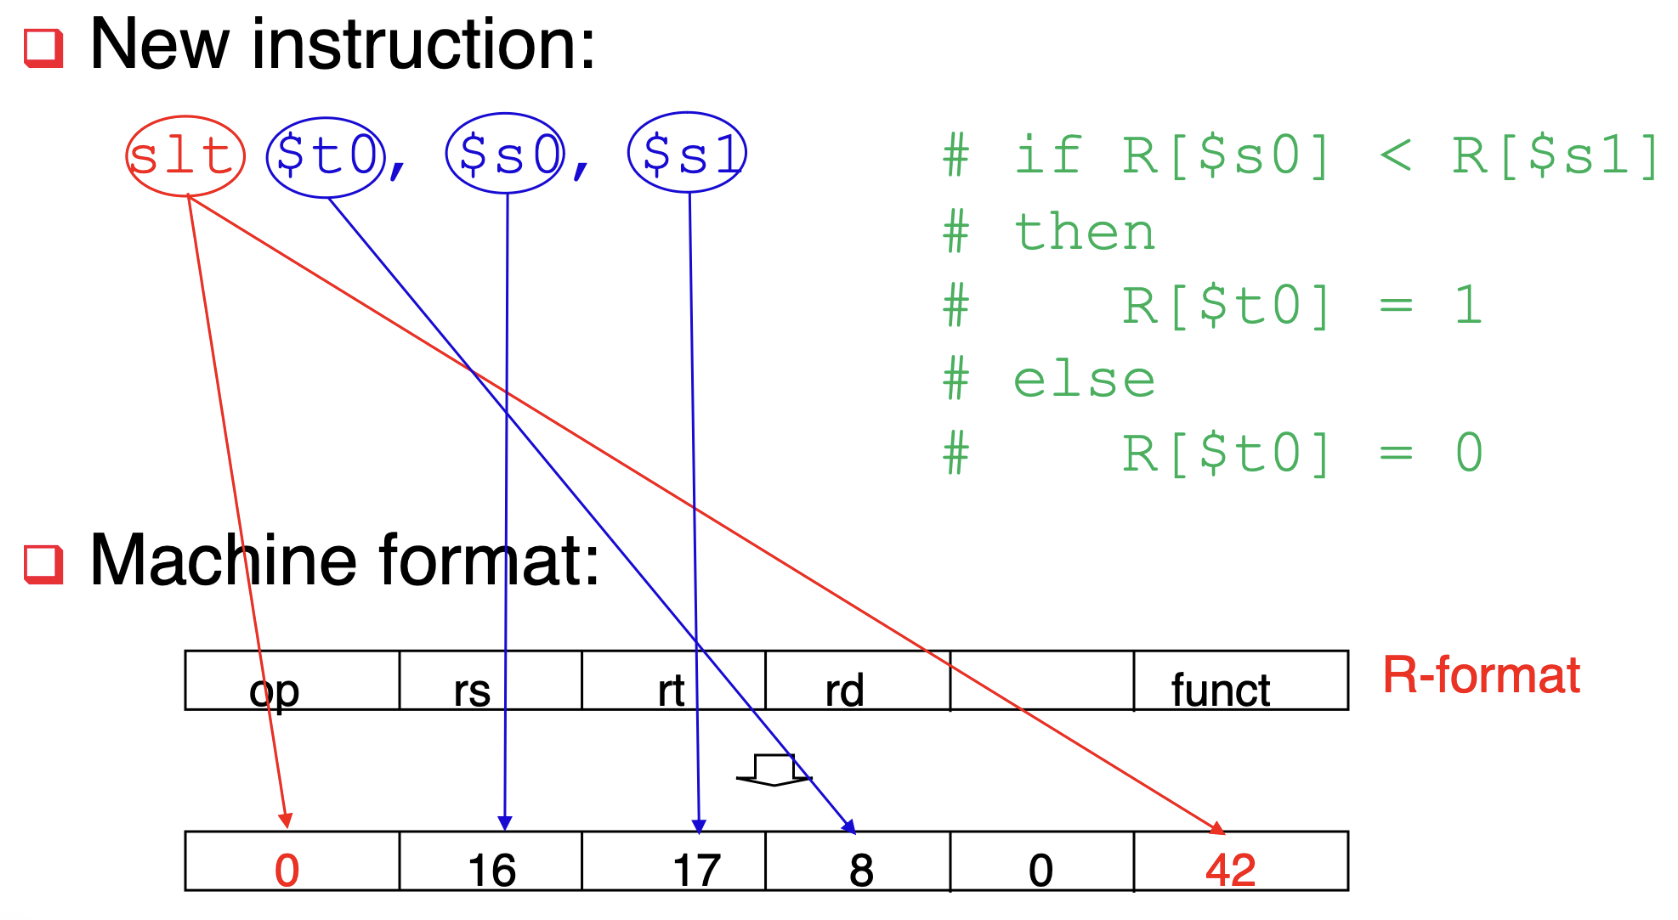

##slt

There is also slti comparing to an immediate value (i-type)

as well as sltu for unsigned 

##<center>**Other Branch Instructions:**

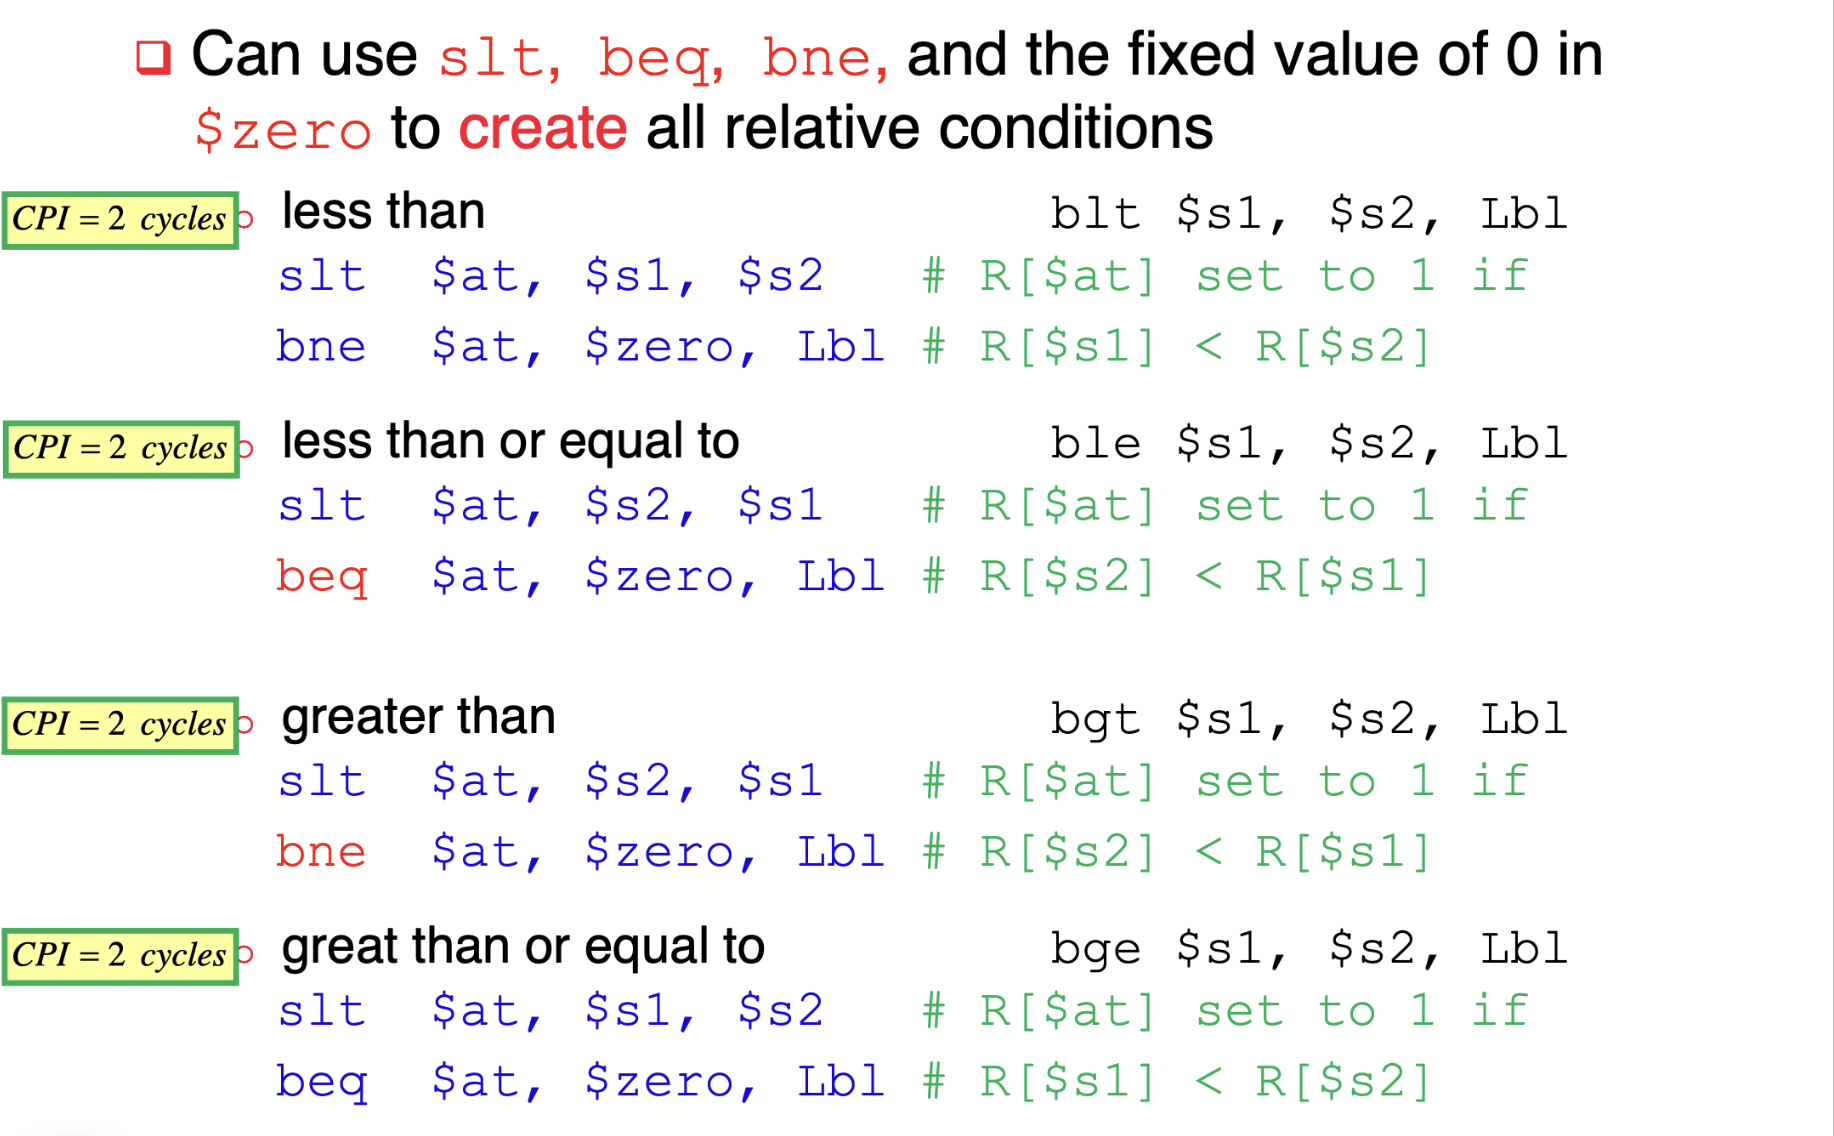

##<center>**Compiling Loop Statements (AND'ed conditions):**

C code:

while (( i >= 0) && (save[i] == k)) {i -= 5};

  ```i in $s3, k in $s5, address of save in $s6```



For Optimization: if there are multiple conditions, then invert the logic of one condition, and keep the other the same

##<center>**Another Instruction for Changing Flow:**

* Most higher level languages have *case* or *switch* allowing one of many alternatives depending on a single value 

* Instruction ( unconditional branch ):
- This is like a pointer to a pointer
  - R[$t1] holds a 32-bit address
    - jump to the address stored in R[$t1]

```jr $t1   #go to address in R[$t1]```

Jump Register is: R-format

Machine Format:

  | 6 | 5 | 5 | 5 | 5 | 6 |


  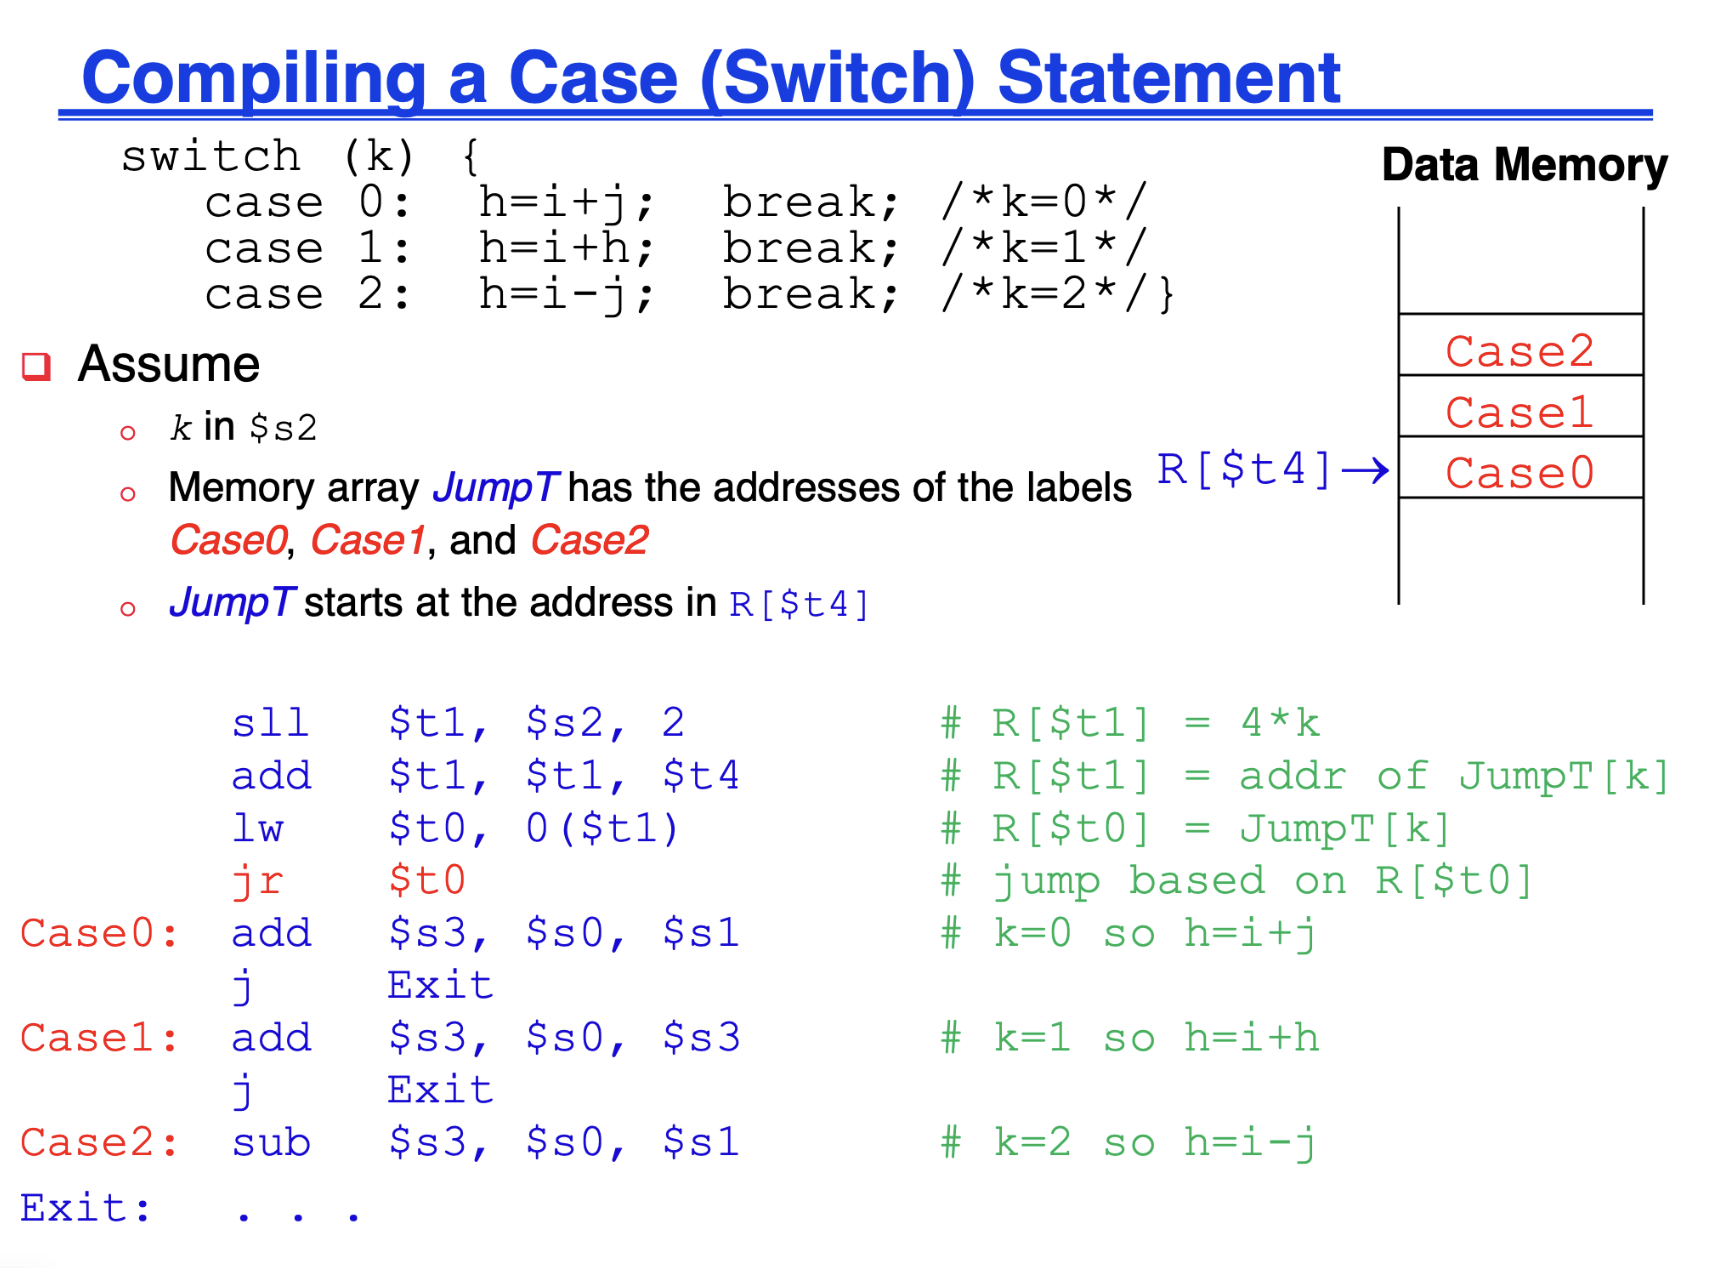

#<center>**Procedures and Routines:**

Programming Style:
  * Procedures ( subroutines, functions )
    * structure programs making them 
      * easier to understand/debug
      * alloring code to be reused 


**Six Steps In Execution of a Procedure:**

1. Main routine ( caller ) places parameters in a place where the precedure ( callee ) can access them
  * ```$a0 - $a4```: four *argument* registers

2. Caller transfers control to the callee
3. Callee acuires the storage resources needed 
4. Callee performs desired task
5. Callee places the result value in a place where the caller can access it
  * ```$v0 - $v1```: two value registers for result values

6. Callee returns control to the caller
  * ```$ra```: one return address register to return to the point of origin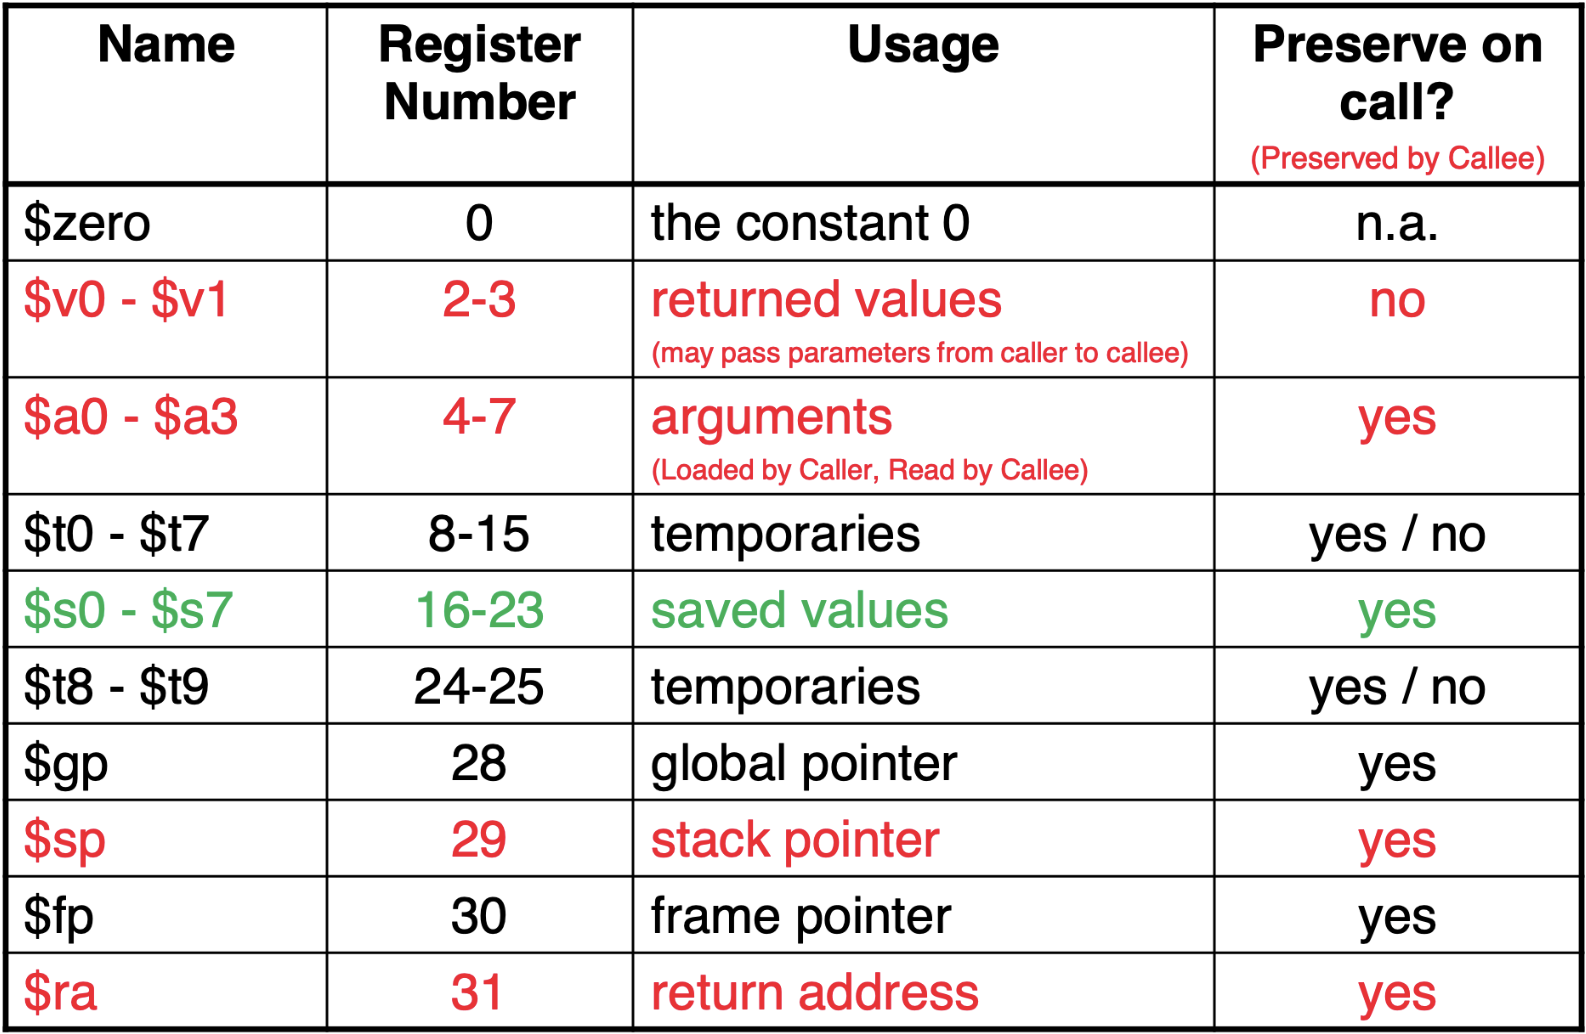

##<center>**Instruction for Calling a Procedure:**

* MIPS *procedure call* instruction ( unconditional branch )
  ```
  jal ProcAddress   # jump and link
  ```
* saves PC of next instruction after jump
* load address of process into PC
* then use jump register to return


* Jumps to *ProcAddress* and saves PC+4 in register \$ra as the link to the following instruction to set up the procedure return 

* jal is a J-format instruction


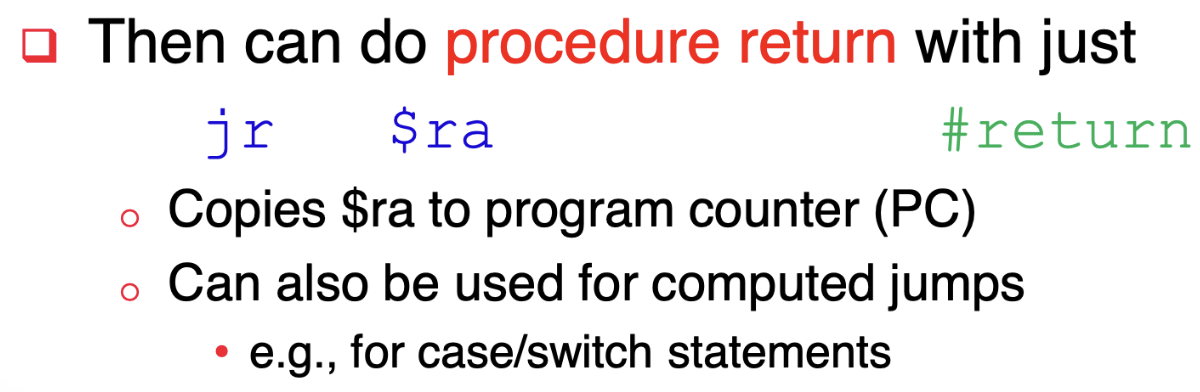

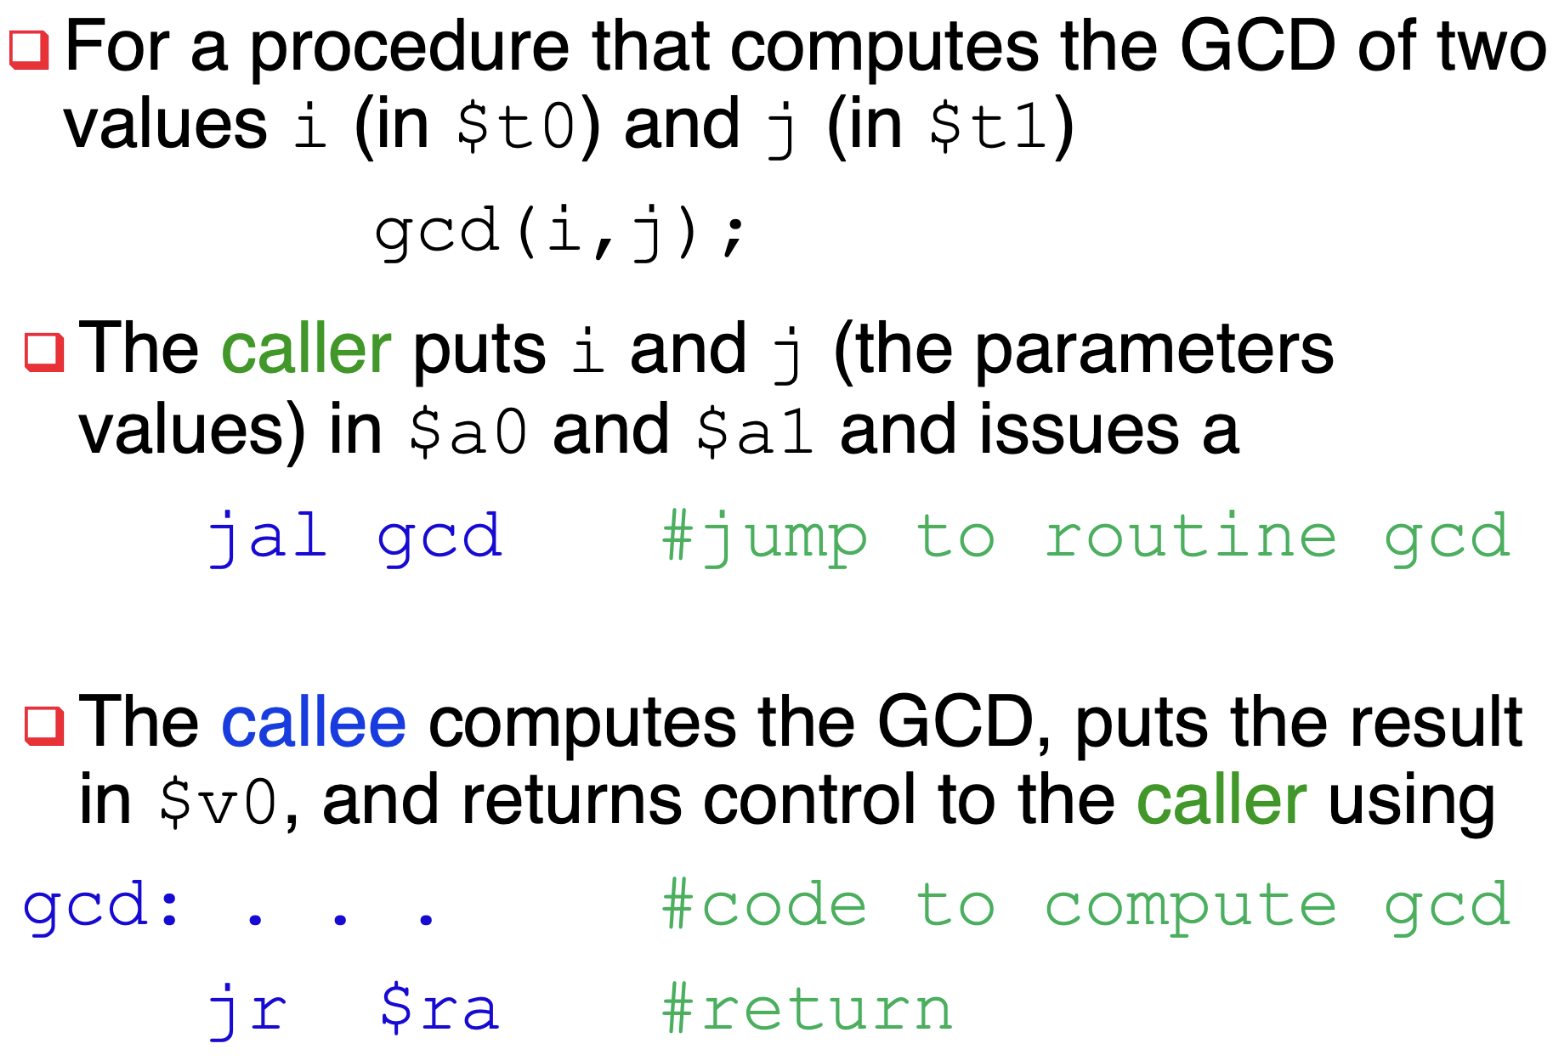

##<center>**Spilling Registers:**

* What if the Callee needs to use more registers than allocated to argument and return values?

  - callee uses a stack

  * One of the general registers, \$sp ( \$29 ) is used to address the stack
    - the stack "grows" from a high addres to a low address 
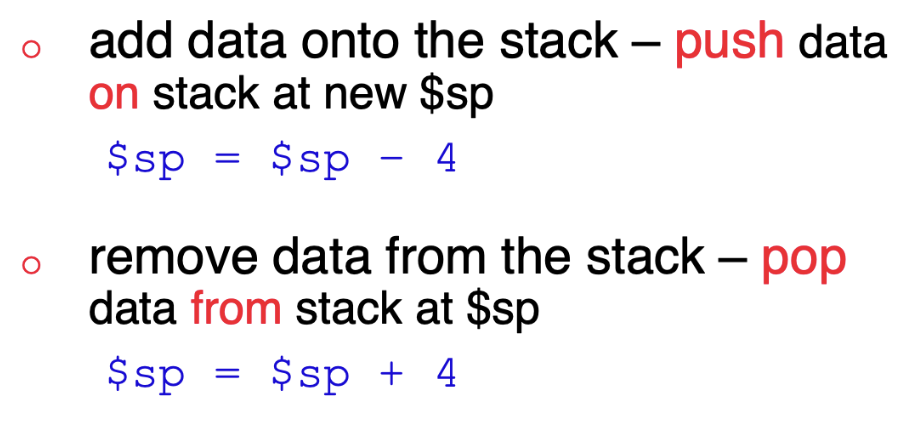

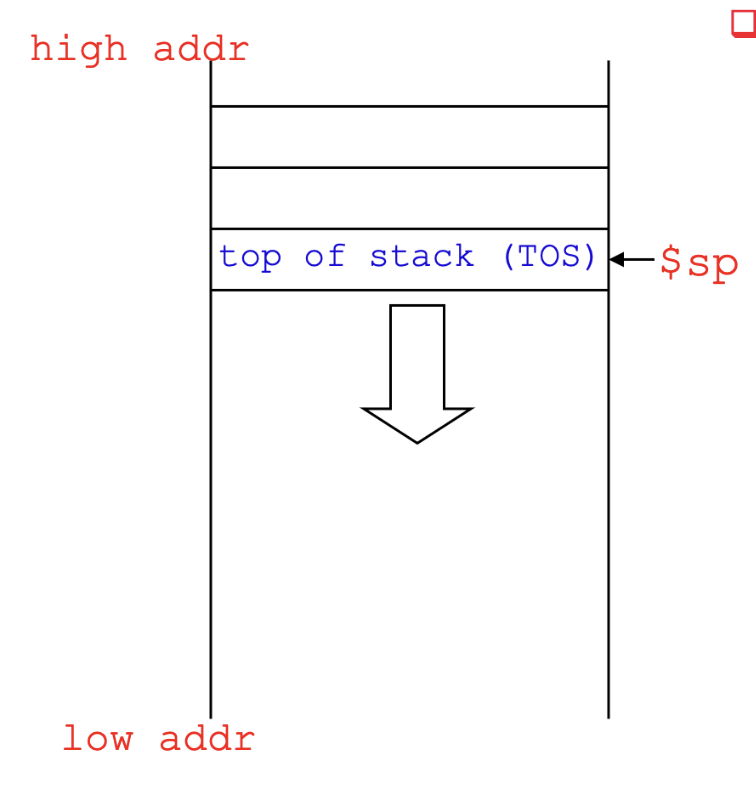

##<center>Memory Layout / Map

* Text Segment:
  - program code 
* Data Segment
  - Static
    - global variables
    - e.g., static variables in C, constant arrays / strings
    - /$gp initialized to address allowing +-offsets into this segment 
  - Dynamic 
    - Heap 
      e.g. malloc in C, new in Java 
    - Stack
      automatic storage 

Example: Compiling a Leaf Procedure 

* Leaf procedures are ones that do not call other procedures. Give the MIPS assember code for 
```
int leaf_ex ( int g, int h, int i, int j )
{
  int f;
  f = ( g + h ) - ( i + j );
  return f;
}
```
where g, h, i, and j are in \$a0 - \$a3


```
leaf_ex: addi $sp, $sp, -8 #make room on the stack, two locations (t0 & t1)

         sw $t1, 4($sp)    #save t1 on the stack
         
         sw $t0, 0($sp)    #save t0 on the stack
         
         add $t0, $a0, $a1 #procedure body

         add $t1, $a2, $a3 #procedure body

         sub $v0, $t0, $t1 #procedure body

         lw $t0, 0($sp)    #restore t0

         lw $t1, 4($sp)    #restore t1

         addi $sp, $sp, 8  #adjust stack pointer

         jr $ra            #return
```

##<center>Non-Leaf Procedures - Convention 2

* Procedures that CALL OTHER PROCEDURES
  ( nested calls )

* For nested calls 

1. Write the body of the code first, figure out which registers you need, preserve them 

##<center>Nested Procedures Ex:


```
int rt_1 ( int i )
{
  if ( i == 0 )
    return 0;
  else
    return rt_2( i - 1);
}
```


```
caller: jal rt_1
next: ...

rt_1:   bne $a0, $zero, to_2
        add $v0, $zero, $zero

        jr $ra
rt_2:   addi $a0, $a0, -1
        jal rt_2
        jr $ra

rt_2: ...
```

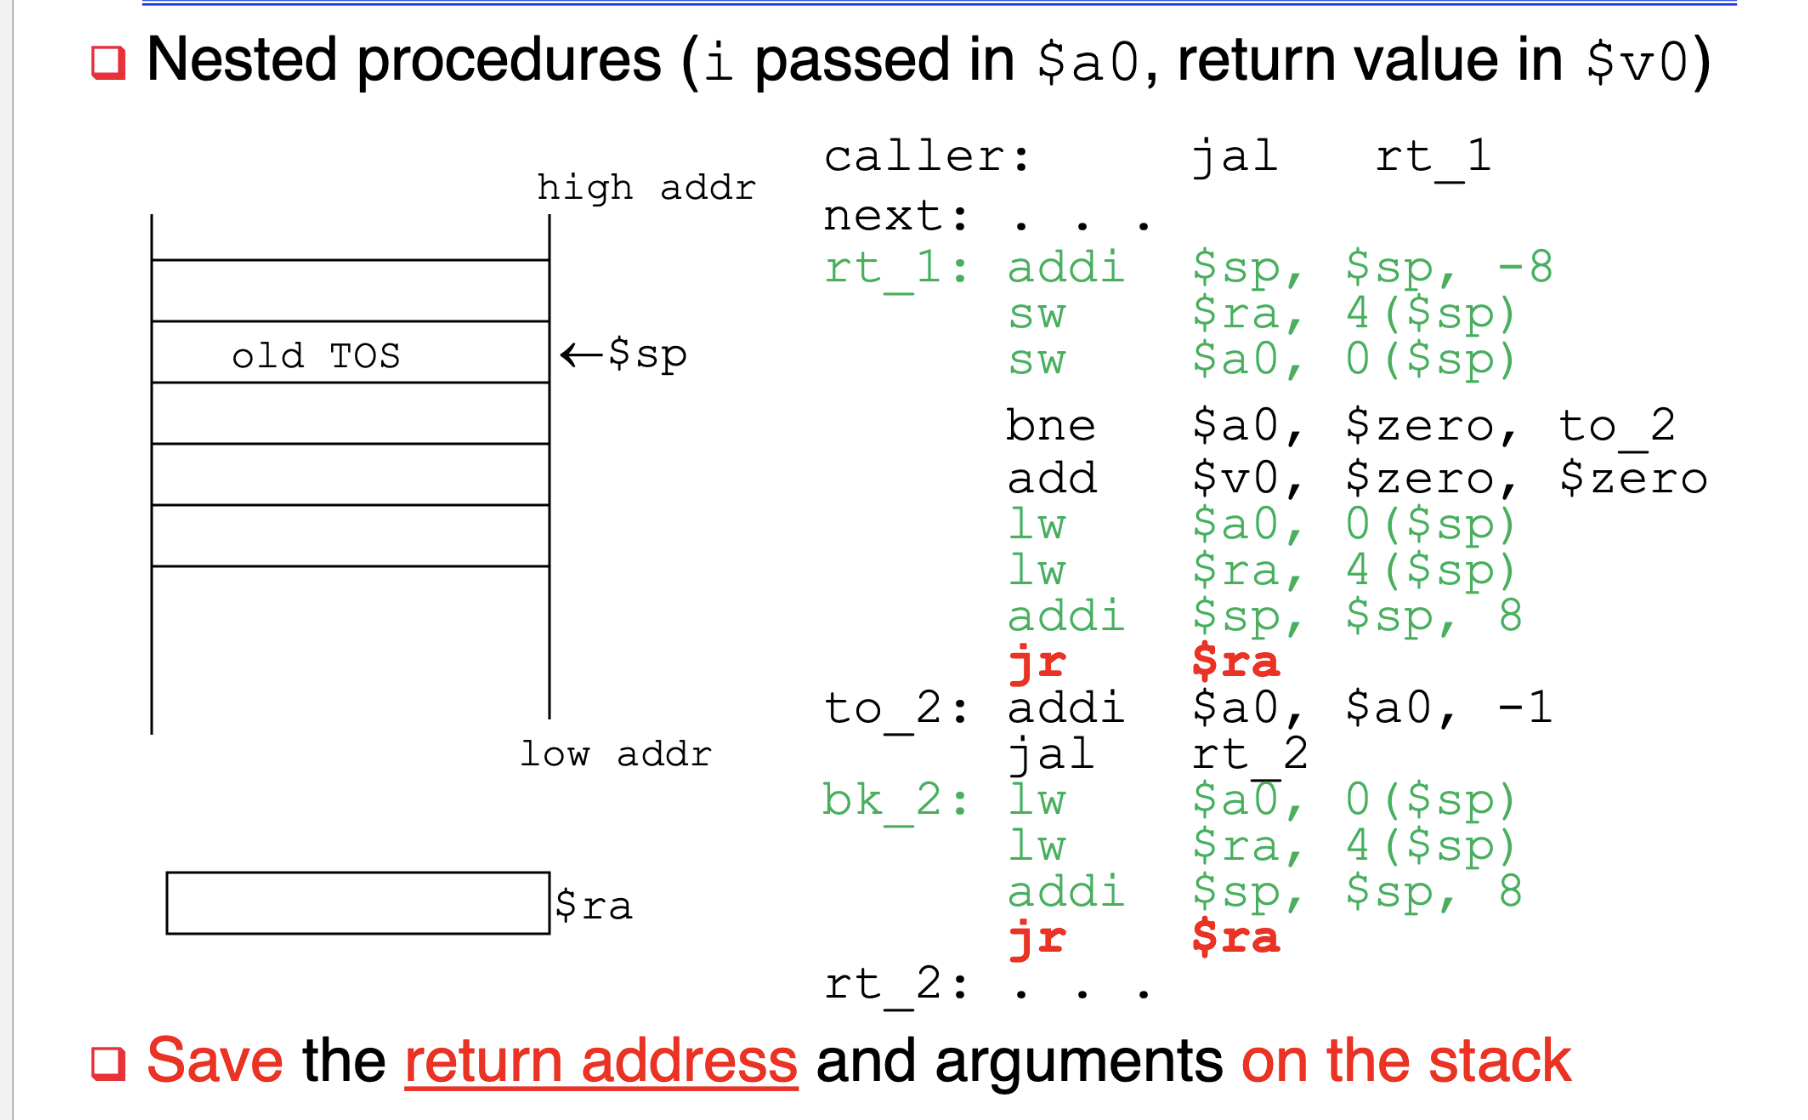

##optimizing nested procedures

To optimize the above code, we don't need to reload the values of \$a0 and \$ra when i == 0

##<center>Allocating Space on the Stack:

* the segment of the stack containinga procedure's saved registers and local variables is its *procedure frame* ( aka *activation record* ) 

* the *frame pointer* ( $fp = $30 )
  - points to the first word of the frame of a procedure
  - provides a stable "base" register for the procedure
    * \$fp is initialized using \\$sp on a call 
    * \$sp is adjustd by callee during call 
    * \$ sp is restored using \\$fp on a return 


Example: Sorting:

```
void sort( int v[], int n )
{
  int i, j;
  for ( i = 0; i < n; i += 1 )
  {
    for ( j = i - 1; j >= 0 && v[ j ] > j[ j + 1 ]; j -= 1)
    {
      swap( v, j );
    }
  }
}
```



#<center>*Character Data:*

##<center>Loading and Storing Bytes:

* MIPS provides special instructions to move bytes 
  lb $t0, 1( $s3 ) # load byte from memory
    * sign extend to 32 bits in rt 
  ls $t0, 6( $s3 ) # store byte to memory 
    * store just the RIGHTMOST byte 
* which 8 bits get loaded and stored? 
  * store byte takes the byte from the rightmost 8 bits of the register and writes it to the byte in memory 
    * leaving the other bytes in the memory word unchanged 


* MIPS also provides instructions for moiving half words 
  lh rt, offset( rs )
  sh rt, offset( rs )

Also: 

  lbu rt, offset( rs )   lhu rt, offset( rs )
    * zero extend 


#**MARS Demonstration:**

MARS is a Java app, so must download java 
  * .jar file 

on windows use the windows batch file to install the tool 

MARS source files have .asm file type 



#<center>**MIPS Hardware Design**

Introduction: we will examine two MIPS implementations
  * simplified version
  * more realistic *pipelined* version

Simple Subset, shows most aspects:
  * Arith/Logical: add, sub, and, or, nor, slt, addi
  * Memory reference: lw, sw
  * Control transfer: beq, j

Final Project: add support for additional 5 instructions



#<center>Abstract Implementation View:
    * elements that operate on data values ( *combinational* )
    * elements that contain state ( *sequential* )

* Single cycle operation
* Split memory ( Harvard ) model - one memory for instructions and one for data
  * vs the Princeton model which had shared memory for instructions and data

#<center>Intruction Exectuion: 

* Fetch → Decode → Execute
  * these can be broken down further into more fine steps 

**1. Fetch**
  * PC → instruction memory, *fetch instruction* 
    * PC update ( $PC_{next} = PC_{inc} = PC_{current} + 4$

**2. Decode** register numbers → register file, read instructions
**3. Execute** depending on instruction class 

  * access data memory for load/store
  * use ALU to calc. 
    * arithm. ops 
    * memory address for load/store
    * branch condition
  * **PC Update**
    * target address or
    * default (*from above*)

Ways to Update PC:
  1. j and jal 
  2. jr
  3. conditional jump/branch
  4. default 

##<center>Updating PC: Disassembling Default Instruction Flow 

Use a separate dedicated ADDER for the PC register 

* The current content of PC is incremented by 4, poiinting to the following instruction

* the result  $( PC_{inc} = PC_{current} + 4 )$ is written into PC BEFORE the *next FETCH cycle*
  * $PC_{next} = PC_{inc}$

##<center>Updating PC: Desassembling Branch Destination

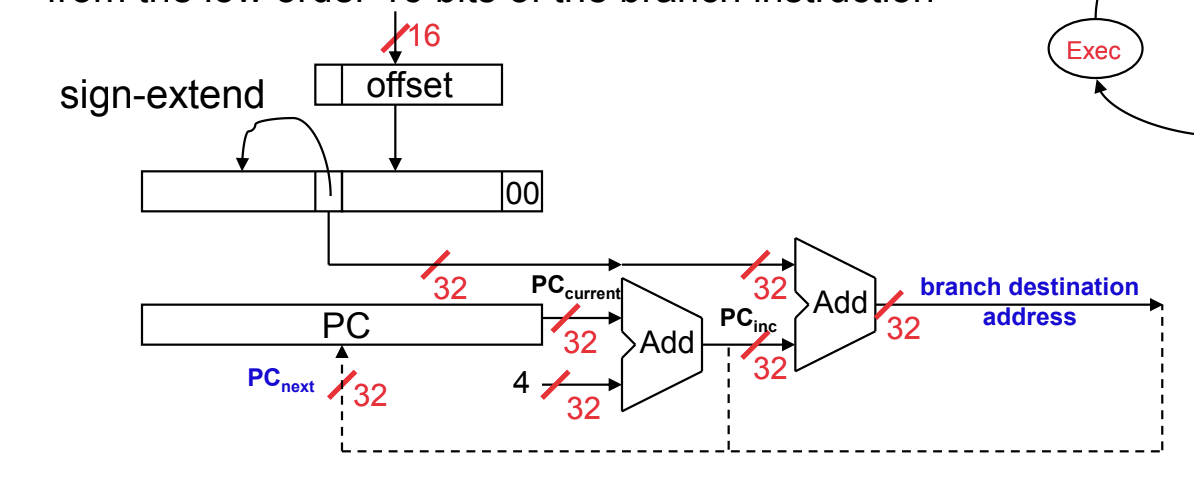

##<center>Updating PC: Disassembling Jump Destination

* Low order 26 bits of the jump intr converted into a 32 bit jump destination address ( address of target instr ) by
  * addressing method

$PC_{next} = PC_{jump\_dest}$



##<CENTER>Putting it all Together:

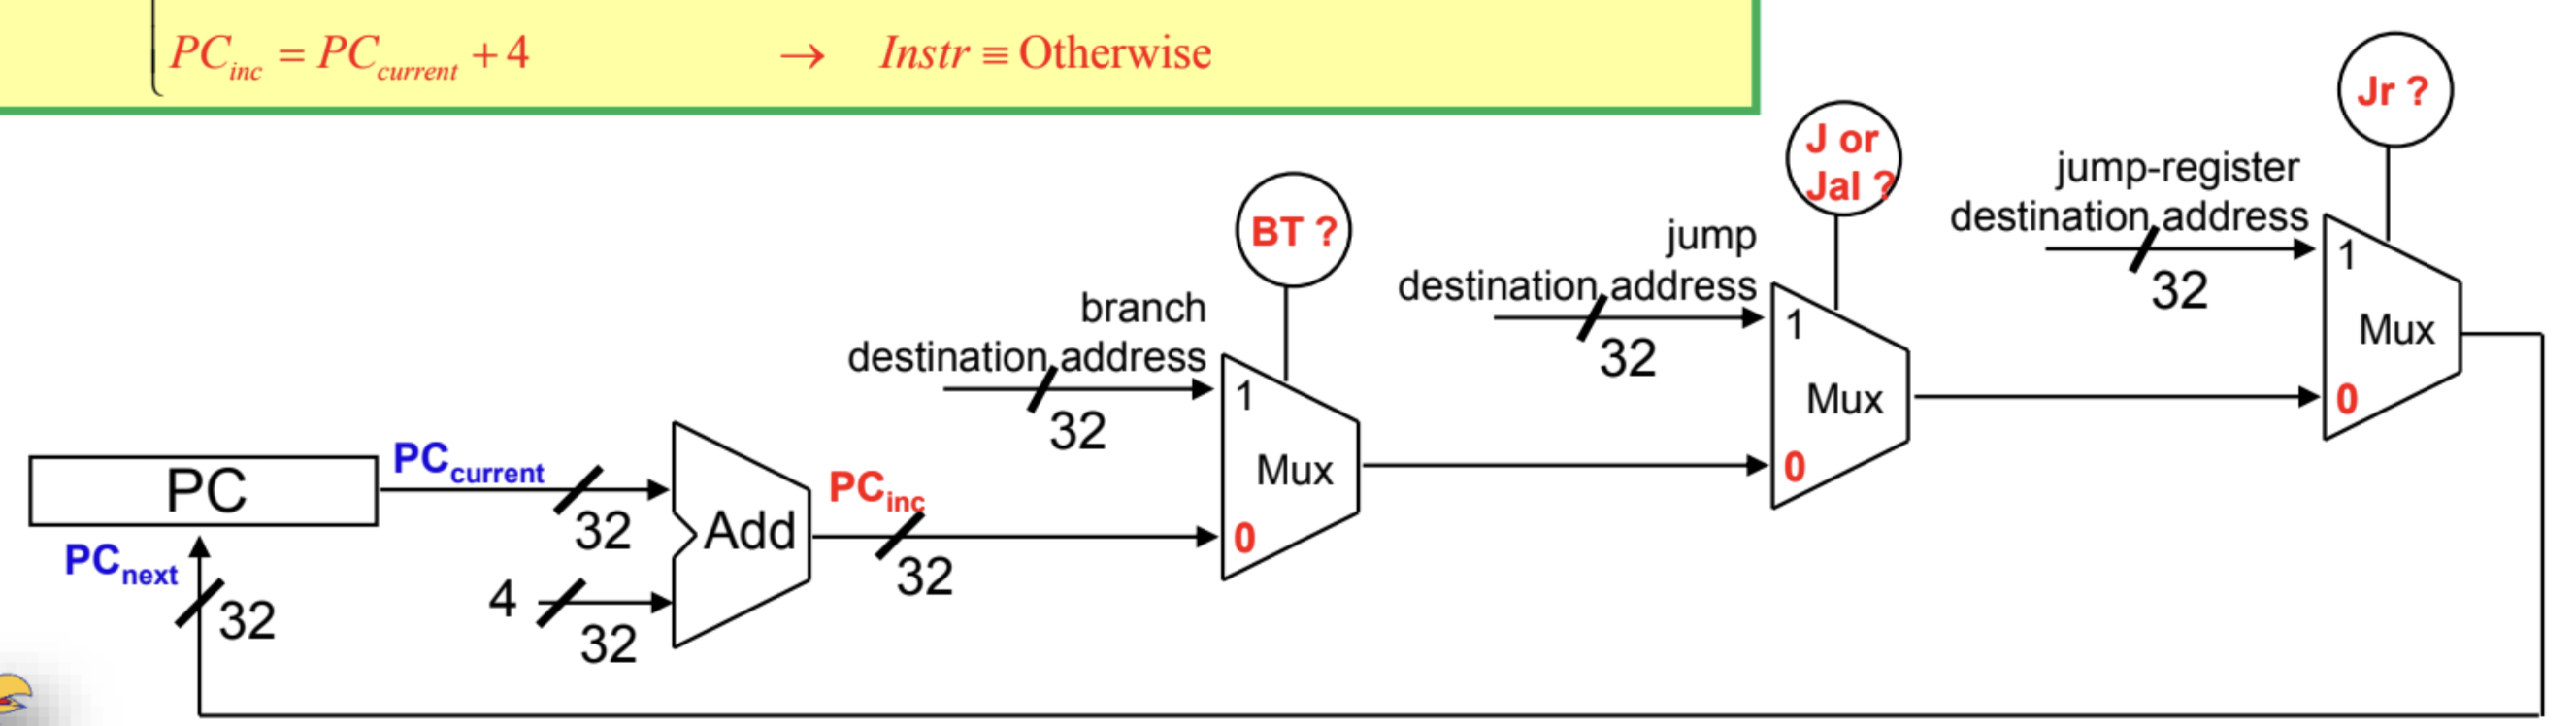

#<center>Executing R-Format Operation:

* R-format ops ( add, sub, and, or, nor, slt )

    * | OP 6-bit | RS 5-bit | RT 5-bit | RD 5-bit | shamt 5-bit | FUNC 5-bit |

1. perform operation ( op and funct ) on values in rs and rt
2. store the reult back into Register File ( into location rd )


<br>

To resolve conflicts in datapath between different formats, use a multiplexor at locations where where are differences controlled by the Control Unit 

#<center> MIPS Memory Layout/Map:


Need to map the logical space to the physical space 
  * physically we will have a smaller space, even though 4GB is logically available 

* gonna need to change the instruction, data memory, and register file
  * the address spilling guards specifically ( lecture 30 slides ) - for data and instruction
  * reset stack pointer for register file 

#<center> Simple Control Strategy:

We wait for everything to *settle down*

* ALU might not produce "right answer" the right way
* memory 


After correctness is established, check the performance 

How is performance measured: 
  * static timing analysis 
  * get the critical path ( path with longest propagation delay )
  * this determines the clock period 
  
  * $\frac{1}{CriticalPathDelay}$

#<center> hints for HW 9
PC REGISTER 

IF rst = 1 
  PC current = 0
elsif clkevent = 1
  pc current = pc next 

DATA MEMORY change 
(A - datamemstart)/4 > 0 and ( A - datamemstart)/4 < datamemdepth

#<center> Non-Pipelined Execution:
  * Single cycle 
  * imbalanced stages 

If there is a program which has L number of stages, each with their own propagation delay 

$T_{clock} = T_{feed} = T_{task} = T_{instruction}$

how do we calcalate this clock speed. 

if we have N number of instructions to execute the L number of stages 

in the non-pipelined version 
  $t^{non-pipelined}_{exec} = N * L_{τ_{avg}}$



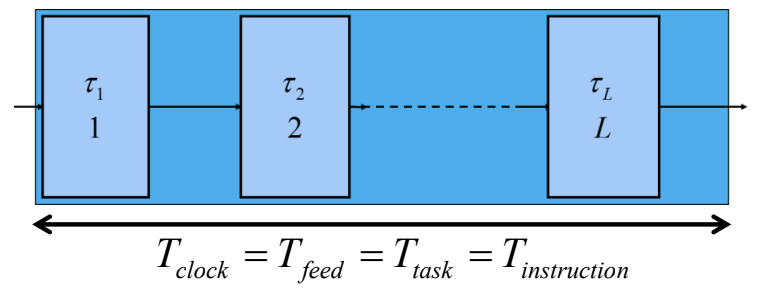

Pipelined Execution( imbalanced stages ) 

$T_{clock} = LongestPropDelay + BufferDelay$

number of cycles 

  $L + ( N - 1 )$



##<center> General Model for Interrupted Pipelined Execution:
  * interruptions are usually called **Hazards**
  * Different types of hazards:
    * Structure Hazards, e.g. memory ( have to wait for memory to return before the data can be worked on )
    * Data hazards, e.g. dependency, a calculation is dependent on the result of another instruction which hasn't finished yet 
    * Control hazards, e.g. branches, 
  
  * Different *penalties* of hazards 
    * even for one type of hazard
    * For example: Read-After-Write (RAW) data hazards


$N =$ workload size ( total number of tasts/instructions )

$N^{non-hazard} =$ number of non-hazardous/interrupting tasks

$N^{hazard}_{i} =$ number of a particular type of hazard 

$K_{hazard} = $ number of different types of hazards 